# Milestone-2

## 1- Perkenalan

> Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

- Nama : Muhammad Irham Dinan
- Batch : FTDS-012
- Dataset : `https://www.kaggle.com/datasets/manishkc06/startup-success-prediction`
- Tujuan : Membuat pemodelan klasifikasi untuk memprediksi keberhasilan suatu startup diakuisisi oleh perusahaan besar agar potensi pertumbuhannya semakin cepat, sehingga memungkinkan mereka untuk selangkah lebih maju dari persaingan.

## 2- Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import warnings
from imblearn.over_sampling import SMOTE

## 3- Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

#### Loading Dataset

In [2]:
# Memuat dataset .csv ke into 'data'

path = 'startup_data.csv'
data = pd.read_csv(path)

In [3]:
# Meninjau dataset menggunakan head()

data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
# Meninjau dataset menggunakan tail()

data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [5]:
# Menduplikasi dataset data ke dalam data_original

data_original = data.copy()

#### Overview Dataset

In [6]:
# Check informasi umum dataset menggunakan info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Based on overview's result above, there are some columns which contain null value (missing value) such as `Unnamed: 6`, `closed_at`, `age_first_milestone_year`, and `age_last_milestone_year`. All of them will be checked whether the missingness is MCAR or not.

In [7]:
# Memeriksa deskriptif statistik dataset menggunakan describe()

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.0,5.722979e+02,3.335854e+02,1.000000,2.835000e+02,5.770000e+02,8.665000e+02,1.153000e+03
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
labels,923.0,6.468039e-01,4.782221e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [8]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

#### Dropping Unrelated Information to Analysis from Dataset

In [9]:
# Mengeluarkan kolom berjenis geografi, id, ataupun yang tidak berkaitan terhadap keperluan analisis

drop_geo_id_columns = ['Unnamed: 0', 'state_code', 'state_code.1', 'latitude', 'longitude', 'zip_code', 'id',
                       'city', 'Unnamed: 6', 'name', 'labels', 'object_id', 'is_CA', 'is_NY',
                       'is_MA', 'is_TX', 'is_otherstate']

data.drop(drop_geo_id_columns, axis=1, inplace=True)

In [10]:
# Mengeluarkan kolom berjenis tipe data tanggal karena sudah diwakili oleh kolom berikut: age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year

drop_date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']

data.drop(drop_date_columns, axis=1, inplace=True)

In [11]:
data.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

#### Renaming & Changing Values of Target

In [12]:
# Mengubah nama 'status' menjadi 'is_acquired'

data.rename(columns={'status':'is_acquired'}, inplace=True)
data['is_acquired'] = data.is_acquired.map({'acquired':1, 'closed':0})

## 4- Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

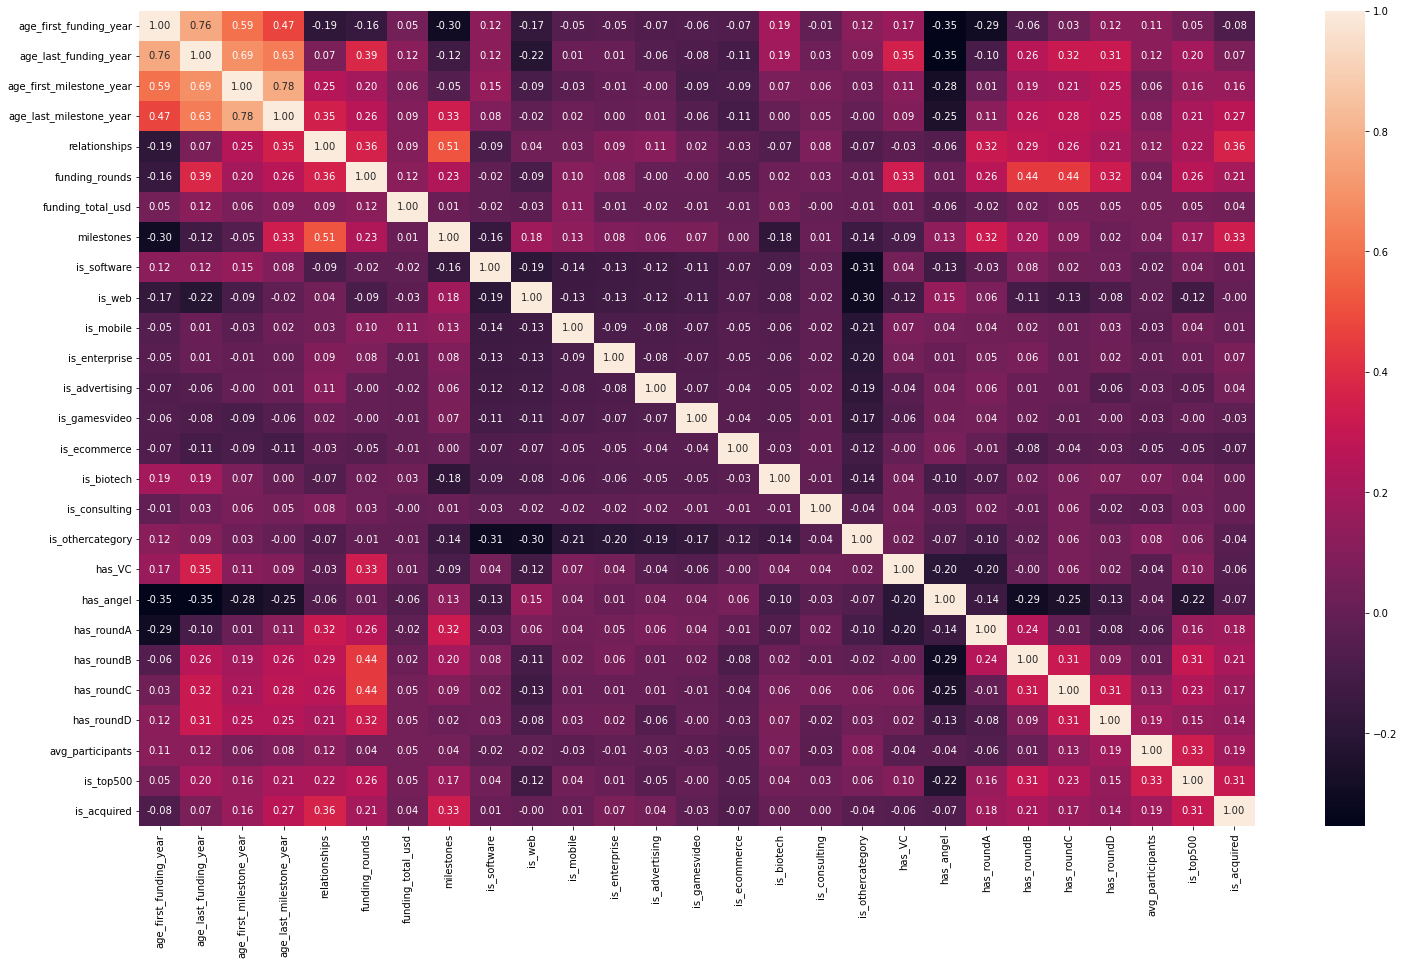

In [13]:
# Membuat visualisasi korelasi hubungan fitur terhadap target dengan heatmap()

plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa fitur-fitur yang diwakili pada kolom `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `has_roundA`, `has_roundB`, `has_roundC`, `avg_participants`, dan `is_top500` memiliki korelasi yang cukup terhadap target `is_acquired`, setidaknya nilai korelasi di antaranya paling kecil adalah 0,15 hingga 0,36.

Adapun kolom-kolom di atas merupakan representasi kolom numerik dalam melihat hubungan korelasi antara fitur dengan target, sementara untuk kolom kategori seperti `category_code` yaitu jenis startup-nya di bidang apa, sudah terwakili pada kolom encodingnya yaitu `is_software`, `is_web`, `is_mobile`, `is_enterprise`, `is_advertising`, `is_gamesvideo`, `is_ecommerce`, `is_biotech`, `is_consulting`, `is_othercategory`.

Adapun kolom-kolom `has_VC`, `has_angel`, `has_roundA`, `has_roundB`, `has_roundC`, `has_roundD`, `is_top500` merupakan kolom hasil encoding dari dataset yang berupa tabulasi nilai 1 dan 0 untuk pertanyaan-pertanyaannya, seperti `has_VC` dan `has_angel` berkaitan apakah startup memiliki pemodal venture capitalist atau penyumbang sukarela angel investor-nya, juga pada kolom `has_roundA`, `has_roundB`, `has_roundC`, `has_roundD`, `is_top500` berkaitan apakah startup memperoleh pendanaan series A,B,C, atau D dan apakah valuasi startup berada di 500 teratas secara keseluruhan.

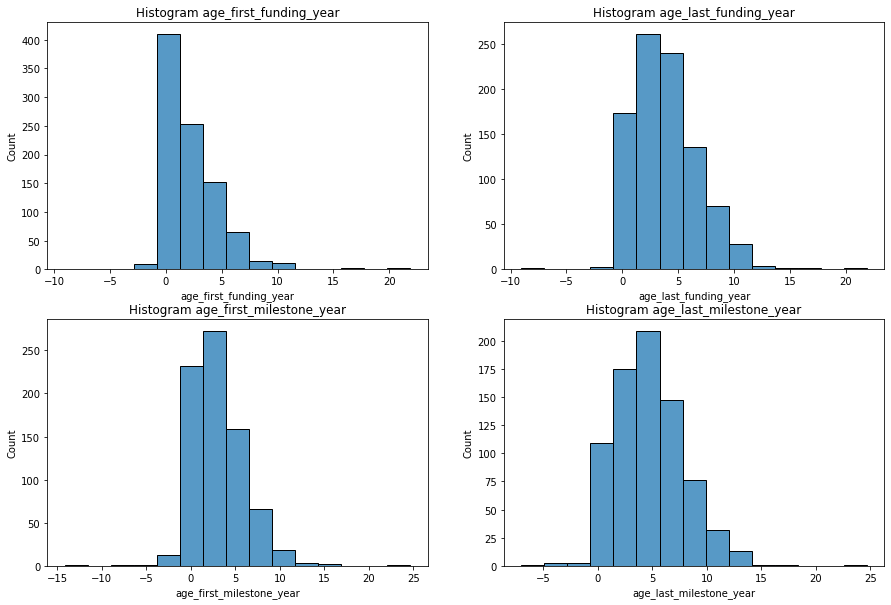

In [14]:
# Membuat visualisasi sebaran data pada kelompok kolom usia funding dan kolom usia milestone

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.histplot(data['age_first_funding_year'], bins=15)
plt.title('Histogram age_first_funding_year')

plt.subplot(2, 2, 2)
sns.histplot(data['age_last_funding_year'], bins=15)
plt.title('Histogram age_last_funding_year')

plt.subplot(2, 2, 3)
sns.histplot(data['age_first_milestone_year'], bins=15)
plt.title('Histogram age_first_milestone_year')

plt.subplot(2, 2, 4)
sns.histplot(data['age_last_milestone_year'], bins=15)
plt.title('Histogram age_last_milestone_year')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa perolehan pendanaan pertama kali `age_first_funding_year` pada startup terjadi pada usia startup kurang dari 5 tahun, yaitu terdapat sekitar 800 unit pendanaan, dimana paling tinggi yaitu saat usia startup sekitar 1 tahun (sekitar 400 unit pendanaan). Sementara, perolehan pendanaan terakhir kali `age_last_funding_year` pada startup paling tinggi terjadi pada usia startup usia kurang dari 5 tahun, setelah itu pendanaan turun secara signifikan.

Adapun tercapainya milestone pertama kali `age_first_milestone_year` pada startup terjadi pada usia kurang dari 5 tahun mencapai lebih dari 450 unit ketercapaian milestone. Sementara, ketercapaian milestone terakhir kali `age_first_milestone_year` pada startup terjadi puncaknya pada usia sekitar 5 tahun, lalu berangsur-angsur menurun.

Maka, dapat disimpulkan secara umum 5 tahun pertama menjadi sangat penting bagi startup karena pada periode tersebut biasanya terjadi suatu pendanaan dan ketercapaian suatu milestone.

Hal lain yang perlu diperhatikan ialah usia <0 atau bernilai negatif pada sebaran data pada keempat kolom di atas perlu diperiksa kembali mengingat usia tidak mungkin bernilai negatif.

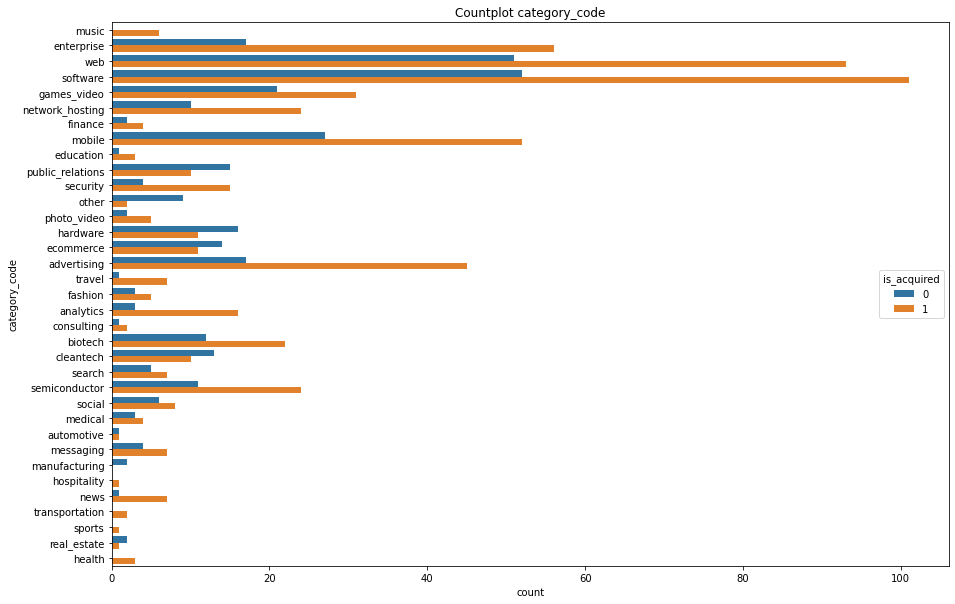

In [15]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 10))

plt.subplot(1, 1, 1)
sns.countplot(y='category_code', hue='is_acquired', data=data)
plt.title('Countplot category_code')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `category_code` terhadap kolom target `is_acquired`, yaitu ada beberapa bidang startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi hampir 2x lipatnya daripada bidang lainnya, seperti startup di bidang music, enterprise, web, software, network hosting, finance, mobile, education, security, photo-video, advertising, travel, analytics, consulting, biotech, semiconductor, news, transportation, sport, dan health. Sementara, pada bidang public relation, hardware, ecommerce, dan lainnya justru rasio tidak berhasil diakuisisi lebih besar daripada diakuisisi.

Sehingga dapat dipertimbangkan bahwa fitur kategori `category_code` ini memiliki korelasi yang cukup terhadap target `is_acquired`.

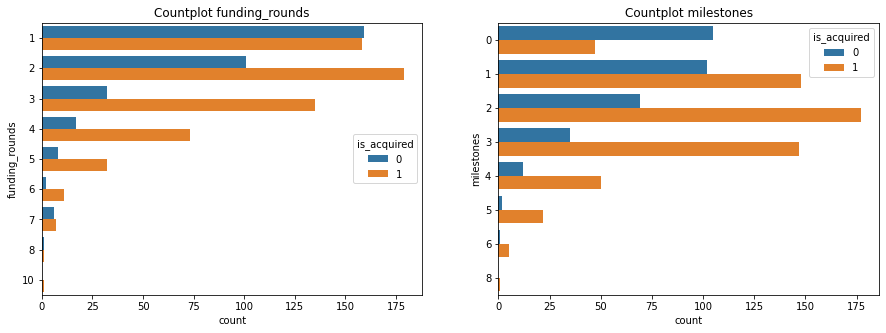

In [16]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(y='funding_rounds', hue='is_acquired', data=data)
plt.title('Countplot funding_rounds')

plt.subplot(1, 2, 2)
sns.countplot(y='milestones', hue='is_acquired', data=data)
plt.title('Countplot milestones')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `funding_rounds` terhadap kolom target `is_acquired`, yaitu apabila pendanaannya sudah dilakukan setidaknya 2x (diwakili no. 2) maka startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi. Selain itu, rata-rata pendanaan `funding_rounds` sekitar 2,5 pada `is_acquired` = 1 lebih tinggi daripada label = 0 yang nilainya rata-ratanya <2.

Pada kolom lainnya, terdapat juga kekhasan tertentu pada kolom fitur `milestones` terhadap kolom target `is_acquired`, yaitu apabila milestonenya tercapai setidaknya 1x dan seterusnya maka startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi. Selain itu, rata-rata banyaknya ketercapaian `milestones` sekitar 2,1 pada `is_acquired` = 1 lebih tinggi daripada label = 0 yang nilai rata-ratanya sekitar 1 (1,25).

Sehingga dapat dipertimbangkan bahwa fitur `funding_rounds` dan `milestones`ini memiliki korelasi yang cukup terhadap target `is_acquired`.

In [17]:
data.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'is_acquired'],
      dtype='object')

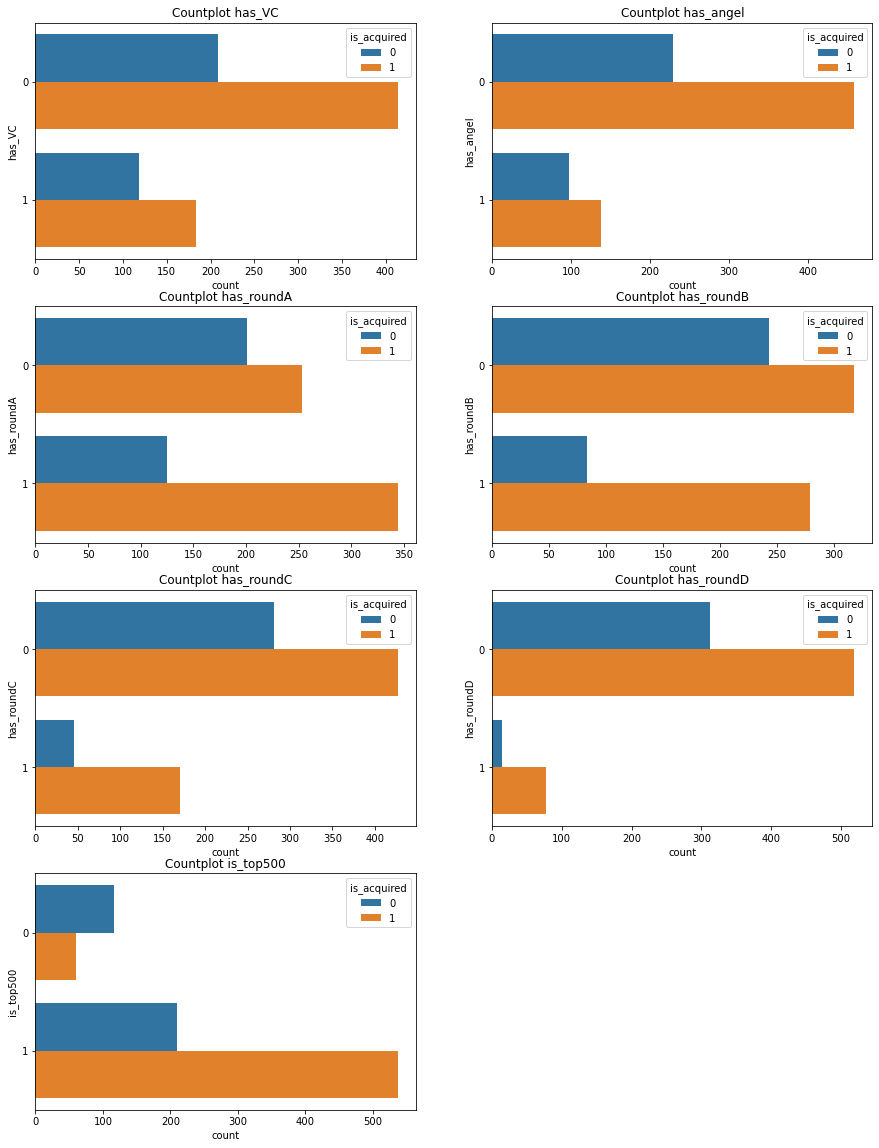

In [18]:
# Membuat visualisasi distribusi data melalui .countplot()

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(y='has_VC', hue='is_acquired', data=data)
plt.title('Countplot has_VC')

plt.subplot(4, 2, 2)
sns.countplot(y='has_angel', hue='is_acquired', data=data)
plt.title('Countplot has_angel')

plt.subplot(4, 2, 3)
sns.countplot(y='has_roundA', hue='is_acquired', data=data)
plt.title('Countplot has_roundA')

plt.subplot(4, 2, 4)
sns.countplot(y='has_roundB', hue='is_acquired', data=data)
plt.title('Countplot has_roundB')

plt.subplot(4, 2, 5)
sns.countplot(y='has_roundC', hue='is_acquired', data=data)
plt.title('Countplot has_roundC')

plt.subplot(4, 2, 6)
sns.countplot(y='has_roundD', hue='is_acquired', data=data)
plt.title('Countplot has_roundD')

plt.subplot(4, 2, 7)
sns.countplot(y='is_top500', hue='is_acquired', data=data)
plt.title('Countplot is_top500')

plt.show()

Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom `has_VC` dan `has_angel` dimana startup yang memiliki pemodal venture capitalist dan penyumbang sukarela angel investor keduanya didominasi oleh label `is_acquired`=1, sehingga tidak ada pembeda antara yang memiliki pendaan awal (seed) dengan yang tidak pada kemungkinan untuk diakuisis atau tidaknya.

Kolom lainnya juga menunjukan hal yang sama, yaitu tidak terdapat kekhasan tertentu pada kolom `has_roundA`, `has_roundB`, `has_roundC` dan `has_roundD` dimana startup yang memiliki pendanaan series A,B,C,D ataupun tidak keduanya didominasi oleh label `is_acquired`=1, sehingga tidak ada pembeda antara yang memiliki pendaan series A,B,C,D dengan yang tidak pada kemungkinan untuk diakuisis atau tidaknya.

Hal menarik justru terjadi pada kolom `is_top500` dimana terjadi kekhasan tertentu pada kolom tersebut yaitu startup yang dikategorikan bervaluasi tinggi dan masuk top500 maka kemungkinan untuk diakusisi oleh perusahaan besar lainnya atau dibeli `is_acquired`=1 lebih tinggi, sementara startup yang di luat kategori tersebut justru peluang tidak diakuisi lebih besar.

Sehingga dapat dipertimbangkan bahwa fitur `is_top500` ini memiliki korelasi yang cukup terhadap target `is_acquired`.

In [19]:
# Melakukan pengelompokan dan agregasi pada variabel relationships terhadap is_acquired

data.groupby(by=['is_acquired'])[['relationships']].mean().sort_values(by='relationships',ascending=False)

,relationships
is_acquired,
1,9.644891
0,4.168712


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `relationships` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai derajat relasi `relationships` yang lebih tinggi 2x daripada yang tidak diakuisisi. Sehingga dapat dipertimbangkan bahwa fitur `relationships` ini memiliki korelasi yang cukup kuat terhadap target `is_acquired`.

In [20]:
# Melakukan pengelompokan dan agregasi pada variabel relationships terhadap is_acquired

data.groupby(by=['is_acquired'])[['funding_rounds']].mean().sort_values(by='funding_rounds',ascending=False)

,funding_rounds
is_acquired,
1,2.522613
0,1.923313


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `funding_rounds` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai derajat relasi `funding_rounds` yang lebih tinggi daripada yang tidak diakuisisi < 2,0. Sehingga dapat dipertimbangkan bahwa fitur `funding_rounds` ini memiliki korelasi yang cukup kuat terhadap target `is_acquired`.

In [21]:
# Melakukan pengelompokan dan agregasi pada variabel age_first_funding_year & age_last_funding_year terhadap is_acquired

data.groupby(by=['is_acquired'])[['age_first_funding_year', 'age_last_funding_year']].mean().sort_values(by='is_acquired',ascending=False)

,age_first_funding_year,age_last_funding_year
is_acquired,,
1,2.095389,4.093073
0,2.492452,3.635489


Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom fitur `age_first_funding_year` dan `age_last_funding_year` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi dengan yang tidak berhasil diakusisi hanya terpaut 0,4 tahun atau kurang dari 6 pada konteks usia startup saat peroleh pendanaan pertama dan pendanaan terakhirnya dimana angka tersebut tidak cukup signifikan perbedaannya. 

Sehingga dapat dipertimbangkan bahwa fitur `age_first_funding_year` dan `age_last_funding_year` ini tidak memiliki korelasi yang cukup terhadap target `is_acquired`.

In [22]:
# Melakukan pengelompokan dan agregasi pada variabel age_first_milestone_year & age_last_milestone_year terhadap is_acquired

data.groupby(by=['is_acquired'])[['age_first_milestone_year', 'age_last_milestone_year']].mean().sort_values(by='is_acquired',ascending=False)

,age_first_milestone_year,age_last_milestone_year
is_acquired,,
1,3.361397,5.295417
0,2.293706,3.408055


Berdasarkan sajian di atas, dapat dilihat bahwa tidak terdapat kekhasan tertentu pada kolom fitur `age_first_milestone_year` dan `age_last_milestone_year` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi dengan yang tidak berhasil diakusisi terpaut 1,1 tahun dan 1,8 pada konteks usia startup saat tercapai milestone pertama dan milestone terakhirnya dimana angka tersebut cukup berbeda signifikan. 

Sehingga dapat dipertimbangkan bahwa fitur `age_first_milestone_year` dan `age_last_milestone_year` ini memiliki korelasi yang cukup kuat terhadap target `is_acquired`.

In [23]:
# Melakukan pengelompokan dan agregasi pada variabel avg_participants terhadap is_acquired 

data.groupby(by=['is_acquired'])[['avg_participants']].mean().sort_values(by='avg_participants',ascending=False)

,avg_participants
is_acquired,
1,3.096093
0,2.367017


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `avg_participants` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai rata-rata pesertanya `avg_participants` yang lebih tinggi 1,3x daripada yang tidak diakuisisi. Sehingga dapat dipertimbangkan bahwa fitur `avg_participants` ini memiliki korelasi yang cukup kuat terhadap target `is_acquired`.

In [24]:
# Melakukan pengelompokan dan agregasi pada variabel funding_total_usd terhadap is_acquired funding_total_usd

data.groupby(by=['is_acquired'])[['funding_total_usd']].mean().sort_values(by='funding_total_usd',ascending=False)

,funding_total_usd
is_acquired,
1,3.104662e+07
0,1.511532e+07


Berdasarkan sajian di atas, dapat dilihat bahwa terdapat kekhasan tertentu pada kolom fitur `funding_total_usd` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai rata-rata total pendaan yang diperoleh (dalam USD) `funding_total_usd` yang lebih tinggi 2x daripada yang tidak diakuisisi. Sehingga dapat dipertimbangkan bahwa fitur `funding_total_usd` ini memiliki korelasi yang cukup kuat terhadap target `is_acquired`.

#### Prehandling for missing value detections

In [25]:
# Memeriksa seberapa banyak jumlah nilai negatif

neg_f = data[((data['age_first_milestone_year'] < 0) == True)]
neg_f.groupby(by=['is_acquired'])[['age_first_milestone_year']].count()

,age_first_milestone_year
is_acquired,
0,20
1,26


In [26]:
# Memeriksa seberapa banyak jumlah nilai negatif

neg_l = data[((data['age_last_milestone_year'] < 0) == True)]
neg_l.groupby(by=['is_acquired'])[['age_last_milestone_year']].count()

,age_last_milestone_year
is_acquired,
0,7
1,5


Berdasarkan tinjauan di atas, tidak terdapat pola data negatif tertentu berkaitan dengan target `is_acquired`. Maka dapat diasumsikan data negatif tersebut sebagai missing value dengan kondisi MCAR, untuk selanjutnya akan dilakukan handling sebagaimana mestinya (dapat dilakukan *dropping*).

In [27]:
# Memeriksa seberapa banyak jumlah nilai null value pada age_first_milestone_year dan hubungannya terhadap target


misval_1 = len(data[(data['age_first_milestone_year'].isnull() == True) & (data['is_acquired'] == 1)])
misval_0 = len(data[(data['age_first_milestone_year'].isnull() == True) & (data['is_acquired'] == 0)])

print("missing value total in 'is_acquired' = 1 :", misval_1)
print("missing value total in 'is_acquired' = 0 :", misval_0)

missing value total in 'is_acquired' = 1 : 47
missing value total in 'is_acquired' = 0 : 105


In [28]:
# Memeriksa seberapa banyak jumlah nilai null value pada age_last_milestone_year dan hubungannya terhadap target


misval2_1 = len(data[(data['age_last_milestone_year'].isnull() == True) & (data['is_acquired'] == 1)])
misval2_0 = len(data[(data['age_last_milestone_year'].isnull() == True) & (data['is_acquired'] == 0)])

print("missing value total in 'is_acquired' = 1 :", misval2_1)
print("missing value total in 'is_acquired' = 0 :", misval2_0)

missing value total in 'is_acquired' = 1 : 47
missing value total in 'is_acquired' = 0 : 105


Berdasarkan tinjauan di atas, dapat dilihat bahwa terdapat pola kehilangan data lebih banyak pada kelompok `is_acquired` = 0 yaitu 105 (2x lipatnya), sementara pada label 1 hanya 47. Sehingga dapat diasumsikan bahwa startup yang gagal diakuisisi informasi terkait usia saat terpacai milestone pertama & milestone terakhirnya tidak dapat diperoleh informasinya. Sehingga, akan dilakukan prosedur *feature engineering* yang tepat untuk kasus ini sebagaimana mestinya. Untuk kepentingan selanjutnya, data/value yang mengandung null-value pada kolom `age_first_milestone_year` & `age_last_milestone_year` akan ditandai dengan dataframe baru.

In [29]:
# Membuat kolom baru sebagai penanda missing value MNAR pada kolom `age_first_milestone_year` & `age_last_milestone_year`

data['age_milestone_year_null'] = np.where((data['age_last_milestone_year'].isnull() == True) | (data['age_first_milestone_year'].isnull() == True), 1, 0)

## 5- Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Get Data for Model Inference

In [30]:
# Membuat variabel data_inf untuk model inference dari dataset sebanyak 15 sampel 

data_inf = data.sample(13, random_state=25)
data_inf

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age_milestone_year_null
61,3.4986,3.4986,3.0000,3.0000,6,1,5000000,1,cleantech,0,...,0,0,1,0,0,0,1.0000,1,0,0
35,2.6575,2.6575,0.0000,0.0000,1,1,4000000,1,software,1,...,0,0,0,1,0,0,1.0000,1,0,0
814,0.4658,1.2247,0.0000,1.2247,5,2,300000,2,games_video,0,...,0,1,0,1,0,0,2.0000,1,0,0
637,10.3644,10.3644,5.8384,5.8384,4,1,21000000,1,semiconductor,0,...,1,0,0,0,0,0,5.0000,1,0,0
280,0.0548,0.0548,0.0685,0.4000,4,1,100000,2,social,0,...,0,1,0,0,0,0,1.0000,0,0,0
373,1.6658,2.1123,2.3041,3.5507,23,2,6100000,2,social,0,...,0,0,1,1,0,0,1.0000,1,1,0
92,2.5726,2.5726,2.4795,4.6685,7,1,500000,2,web,0,...,0,1,0,0,0,0,5.0000,1,1,0
850,0.4329,1.1260,2.6904,3.5397,23,2,9800000,2,news,0,...,0,1,1,0,0,0,4.5000,1,1,0
465,7.5123,9.9479,0.4164,0.4164,3,5,51450000,1,games_video,0,...,1,0,0,0,0,1,5.6667,1,1,0
381,1.2521,1.8740,4.7178,5.0959,13,3,2600000,2,network_hosting,0,...,0,1,1,0,0,0,3.6667,1,1,0


In [31]:
# Menghapus dan memisahkan Inference Set dari dataset untuk selanjutnya dibuat Train & Test Set-nya

data_train_test = data.drop(data_inf.index)
data_train_test

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age_milestone_year_null
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,...,0,1,0,0,0,0,1.0000,0,1,0
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,...,1,0,0,1,1,1,4.7500,1,1,0
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,...,0,0,1,0,0,0,4.0000,1,1,0
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,...,0,0,0,1,1,1,3.3333,1,1,0
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,...,1,1,0,0,0,0,1.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,advertising,0,...,0,0,1,0,0,0,6.0000,1,1,0
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,security,0,...,1,0,0,1,0,0,2.6667,1,0,0
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,biotech,0,...,0,0,0,0,0,1,8.0000,1,0,0
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,software,1,...,0,0,1,1,0,0,1.0000,1,1,0


In [32]:
# Mengatur ulang nilai bacaan index pada Inference Set & Train-Test Set (untuk meminimalisasi kemungkinan masalah akibat index)

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age_milestone_year_null
0,3.4986,3.4986,3.0000,3.0000,6,1,5000000,1,cleantech,0,...,0,0,1,0,0,0,1.0000,1,0,0
1,2.6575,2.6575,0.0000,0.0000,1,1,4000000,1,software,1,...,0,0,0,1,0,0,1.0000,1,0,0
2,0.4658,1.2247,0.0000,1.2247,5,2,300000,2,games_video,0,...,0,1,0,1,0,0,2.0000,1,0,0
3,10.3644,10.3644,5.8384,5.8384,4,1,21000000,1,semiconductor,0,...,1,0,0,0,0,0,5.0000,1,0,0
4,0.0548,0.0548,0.0685,0.4000,4,1,100000,2,social,0,...,0,1,0,0,0,0,1.0000,0,0,0
5,1.6658,2.1123,2.3041,3.5507,23,2,6100000,2,social,0,...,0,0,1,1,0,0,1.0000,1,1,0
6,2.5726,2.5726,2.4795,4.6685,7,1,500000,2,web,0,...,0,1,0,0,0,0,5.0000,1,1,0
7,0.4329,1.1260,2.6904,3.5397,23,2,9800000,2,news,0,...,0,1,1,0,0,0,4.5000,1,1,0
8,7.5123,9.9479,0.4164,0.4164,3,5,51450000,1,games_video,0,...,1,0,0,0,0,1,5.6667,1,1,0
9,1.2521,1.8740,4.7178,5.0959,13,3,2600000,2,network_hosting,0,...,0,1,1,0,0,0,3.6667,1,1,0


In [33]:
data_inf.dropna(axis=0, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf_ori = data_inf.copy()

In [34]:
# Menampilkan variabel data_train_test 

data_train_test

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age_milestone_year_null
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,...,0,1,0,0,0,0,1.0000,0,1,0
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,...,1,0,0,1,1,1,4.7500,1,1,0
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,...,0,0,1,0,0,0,4.0000,1,1,0
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,...,0,0,0,1,1,1,3.3333,1,1,0
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,...,1,1,0,0,0,0,1.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,advertising,0,...,0,0,1,0,0,0,6.0000,1,1,0
906,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,security,0,...,1,0,0,1,0,0,2.6667,1,0,0
907,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,biotech,0,...,0,0,0,0,0,1,8.0000,1,0,0
908,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,software,1,...,0,0,1,1,0,0,1.0000,1,1,0


### Splitting Dataset

In [35]:
# Memisahkan fitur/variabel bebas 'X' dengan target/variabel terikat 'y' dari data_train_test

X = data_train_test.drop('is_acquired', axis=1)
y = data_train_test[['is_acquired']]

In [36]:
# Menampilkan fitur/variabel bebas 'X'

X.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age_milestone_year_null
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,...,1,0,1,0,0,0,0,1.0000,0,0
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,...,0,1,0,0,1,1,1,4.7500,1,0
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,...,0,0,0,1,0,0,0,4.0000,1,0
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,1,...,0,0,0,0,1,1,1,3.3333,1,0
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,0,...,0,1,1,0,0,0,0,1.0000,1,0


In [37]:
# Menampilkan target/variabel terikat 'y'

y.head()

,is_acquired
0,1
1,1
2,1
3,1
4,0


In [38]:
# Memisahkan antara Train Set (80%) dengan Test Set (20%) menggunakan train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print('Dimensi Train Set \t: ', X_train.shape)
print('Dimensi Test Set \t: ', X_test.shape)

Dimensi Train Set 	:  (728, 28)
Dimensi Test Set 	:  (182, 28)


### Handling Missing Values

#### *In Train Set - Features*

In [39]:
print(X_train.isnull().sum())

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    119
age_last_milestone_year     119
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
age_milestone_year_null       0
dtype: int64


Sebagaimana diketahui pada penemuan fakta bahwa kehilangan data/value pada kolom 'age_first_milestone_year' dan 'age_last_milestone_year' berkaitan erat dengan tidak bisanya diperoleh informasi dari startup tersebut karena startup tersebut telah gagal diakuisi atau bubar direpresentasikan 'is_acquired' = 0, maka kehilangan informasi ini dikategorikan sebagai MNAR (Missing Not At Random), maka metode imputasi yang tepat ialah dengan memberikan penanda *flagging* dan sudah dilakukan pada proses prehandling sebelumnya. Selanjutnya akan dilakukan imputasi menggunakan nilai mediannya, dimana kolom-kolom tersebut tidak berdistribusi normal yaitu nilai ketidaksimetrisan atau skewness value nya ialah > 0,5. Adapun nilai median keduanya ialah 2,5808 untuk 'age_first_milestone_year' dan 4,6082 untuk 'age_last_milestone_year'.

In [40]:
X_train.age_first_milestone_year.skew()

0.878966762877704

In [41]:
X_train.age_last_milestone_year.skew()

0.6774534543641881

In [42]:
X_train.age_first_milestone_year.median()    

2.5808

In [43]:
X_train.age_last_milestone_year.median()    

4.6082

In [44]:
# Fungsi untuk melakukan imputasi dengan nilai median

def impute_na(df, variable, median):
    df[variable].fillna(median, inplace=True)
    return df

In [45]:
# Melakukan imputasi pada Missing Values di kolom 'age_first_milestone_year' dan 'age_last_milestone_year' 

X_train = impute_na(X_train, 'age_first_milestone_year', X_train['age_first_milestone_year'].median())
X_train = impute_na(X_train, 'age_last_milestone_year', X_train['age_last_milestone_year'].median())

In [46]:
# Melakukan handling pada nilai negatif pada kolom age_first_milestone_year & age_last_milestone_year

neg = (X_train[((X_train['age_first_milestone_year'] < 0) == True) | ((X_train['age_last_milestone_year'] < 0) == True)]).index.tolist()

print('jumlah nilai negatif pada kolom \t:', len(neg))
print('% nilai negatif pada kolom \t\t:', len(neg)/len(X_train)*100)

jumlah nilai negatif pada kolom 	: 37
% nilai negatif pada kolom 		: 5.082417582417582


In [47]:
# Melakukan metode drop pada baris yang mengandung nilai negatif mengingat jumlahnya sangat sedikit ~ 5%

X_train.drop(neg, axis=0, inplace=True)

In [48]:
# Memeriksa hasil handling pada nilai negatif pada kolom age_first_milestone_year & age_last_milestone_year

len(X_train[((X_train['age_first_milestone_year'] < 0) == True) | ((X_train['age_last_milestone_year'] < 0) == True)])

0

In [49]:
X_train.shape

(691, 28)

Pada kolom `age_first_milestone_year` dan `age_last_milestone_year` terjadi kehilangan nilai (*missing value*) dengan pertimbangan kehilangan nilai tersebut bersifat MNAR (*misssing not at random*) karena kehilangan tersebut berkaitan dengan target `is_acquired`, dimana *missing value* cenderung banyak terjadi pada kelompok yang nilai `is_acquired` = 0 atau ada kecenderungan kondisi startup yang tidak berhasil diakuisisi itu bubar atau tidak dapat diperoleh informasinya, sehingga metode handling yang tepat pada kondisi tersebut ialah dengan memberikan *flagging* penanda pada kolom yang nilainya null dan dilakukan imputasi menggunakan nilai mediannya.

Sementara, untuk kondisi nilai negatif pada kolom  `age_first_milestone_year` dan `age_last_milestone_year` diasumsikan sebagai *missing value* namun tidak bersifat MNAR, atau murni terjadi kesalahan input/error sehingga diasumsikan bersifat MCAR, maka metode handling yang paling tepat ialah dengan dilakukan drop (dibuang baris yang mengandung nilai <0) mengingat persentasenya pun hanya 4,7% (kurang dari 5%).

#### *In Train Set - Target*

In [50]:
# Melakukan metode drop pada baris di fitur tersebut dilakukan drop juga

y_train.drop(neg, axis=0, inplace=True)

In [51]:
y_train.shape

(691, 1)

#### *In Test Set - Features*

Adapun metode handling yang dilakukan pada train set, semuanya dilakuakn berdasarkan metode yang dilakukan pada train set dan nilai imputasi yang digunakan pada train set juga.

In [52]:
# Melakukan imputasi pada Missing Values di kolom 'age_first_milestone_year' dan 'age_last_milestone_year' berdasarkan nilai train set 

X_test = impute_na(X_test, 'age_first_milestone_year', X_train['age_first_milestone_year'].median())
X_test = impute_na(X_test, 'age_last_milestone_year', X_train['age_last_milestone_year'].median())

In [53]:
# Melakukan handling pada nilai negatif pada kolom age_first_milestone_year & age_last_milestone_year

neg_test = (X_test[((X_test['age_first_milestone_year'] < 0) == True) | ((X_test['age_last_milestone_year'] < 0) == True)]).index.tolist()

print('jumlah nilai negatif pada kolom \t:', len(neg_test))
print('% nilai negatif pada kolom \t\t:', len(neg_test)/len(X_test)*100)

jumlah nilai negatif pada kolom 	: 9
% nilai negatif pada kolom 		: 4.945054945054945


In [54]:
# Melakukan metode drop pada baris yang mengandung nilai negatif mengingat jumlahnya sangat sedikit < 5%

X_test.drop(neg_test, axis=0, inplace=True)

In [55]:
# Memeriksa hasil handling pada nilai negatif pada kolom age_first_milestone_year & age_last_milestone_year

len(X_test[((X_test['age_first_milestone_year'] < 0) == True) | ((X_test['age_last_milestone_year'] < 0) == True)])

0

In [56]:
X_test.shape

(173, 28)

#### *In Test Set - Target*

In [57]:
# Melakukan metode drop pada baris di fitur tersebut dilakukan drop juga

y_test.drop(neg_test, axis=0, inplace=True)

In [58]:
y_test.shape

(173, 1)

### Handling Outliers

#### *In Train Set - Features*

In [59]:
# Menampilkan kembali nama fitur pada X_train

X_train.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'age_milestone_year_null'],
      dtype='object')

Adapun handling outliers yang akan dilakukan hanya pada kolom yang benar-benar bersifat numerik saja (bukan kolom dataset yang merupakan hasil encoding karena nilai pada kolom tersebut sudah berbentuk 0, 1). Maka kolom-kolom berikut yang akan dilakukan handling outliers:
- `age_first_milestone_year`
- `age_last_milestone_year`
- `relationships`
- `funding_rounds`
- `funding_total_usd`
- `milestones`                      
- `avg_participants`

Selain itu, `age_first_funding_year` dan `age_last_funding_year` tidak akan dikerjakan proses handling outliersnya, karena tidak akan dipilih fitur tersebut untuk proses selanjutnya karena hasil EDA-nya tidak menunjukan korelasi yang cukup.          

In [60]:
# Memeriksa nilai derajat ketidaksimetrisan (skewness value) pada X_train untuk fitur 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'

print('nilai ketidaksimetrisan (skewness value) age_first_milestone_year \t: ', X_train.age_first_milestone_year.skew())
print('nilai ketidaksimetrisan (skewness value) age_last_milestone_year \t: ', X_train.age_last_milestone_year.skew())
print('nilai ketidaksimetrisan (skewness value) relationships \t\t\t: ', X_train.relationships.skew())
print('nilai ketidaksimetrisan (skewness value) funding_rounds \t\t: ', X_train.funding_rounds.skew())
print('nilai ketidaksimetrisan (skewness value) funding_total_usd \t\t: ', X_train.funding_total_usd.skew())
print('nilai ketidaksimetrisan (skewness value) milestones \t\t\t: ', X_train.milestones.skew())
print('nilai ketidaksimetrisan (skewness value) avg_participants \t\t: ', X_train.avg_participants.skew())

nilai ketidaksimetrisan (skewness value) age_first_milestone_year 	:  1.8968725361414978
nilai ketidaksimetrisan (skewness value) age_last_milestone_year 	:  1.0626070836068635
nilai ketidaksimetrisan (skewness value) relationships 			:  2.3323369478120837
nilai ketidaksimetrisan (skewness value) funding_rounds 		:  1.3800535360757569
nilai ketidaksimetrisan (skewness value) funding_total_usd 		:  25.566916993110812
nilai ketidaksimetrisan (skewness value) milestones 			:  0.5610837580003668
nilai ketidaksimetrisan (skewness value) avg_participants 		:  1.8464127968204305


Berdasarkan nilai skewness valuenya, distribusi data pada kolom 'X_train' pada kolom `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `funding_total_usd`, `milestones`, dan `avg_participants` tidak berdistribusi normal atau *skewed distribution* karena skewness value > 0,5. Dimana hanya `milestones` yang bersifat tidak ekstrem karena nilainya berada di antara 0,5 dan 1,0. Sehingga analisis selanjutnya akan menggunakan faktor pengali IQR = 1,5 sementara lainnya 3,0.

In [61]:
# Membuat fungsi def find_skewed_boundaries() untuk fitur yang tidak berdistribusi normal untuk memncari nilai batas atas dan batas bawah menggunakan metode Tukey's Rule atau IQR

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [62]:
# Mendefinisikan nilai ekstrem (outlier) berasal dari nilai-nilai diluar batas atas dan bawah fiturnya 
# Memasukan nilai '3.0' untuk fitur yang tidak berdistribusi normal dengan nilai ketidaksimetrisannya (skewness value > 1.0)

print('Nilai batas atas & batas bawah dari age_first_milestone_year \t: ', find_skewed_boundaries(X_train, 'age_first_milestone_year', 3))
print('Nilai batas atas & batas bawah dari age_last_milestone_year \t: ', find_skewed_boundaries(X_train, 'age_last_milestone_year', 3))
print('Nilai batas atas & batas bawah dari relationships \t\t: ', find_skewed_boundaries(X_train, 'relationships', 3))
print('Nilai batas atas & batas bawah dari funding_rounds \t\t: ', find_skewed_boundaries(X_train, 'funding_rounds', 3))
print('Nilai batas atas & batas bawah dari funding_total_usd \t\t: ', find_skewed_boundaries(X_train, 'funding_total_usd', 3))
print('Nilai batas atas & batas bawah dari milestones \t\t\t: ', find_skewed_boundaries(X_train, 'milestones', 1.5))
print('Nilai batas atas & batas bawah dari avg_participants \t\t: ', find_skewed_boundaries(X_train, 'avg_participants', 3))

Nilai batas atas & batas bawah dari age_first_milestone_year 	:  (12.00675, -6.231400000000001)
Nilai batas atas & batas bawah dari age_last_milestone_year 	:  (16.0809, -6.549399999999999)
Nilai batas atas & batas bawah dari relationships 		:  (31.0, -18.0)
Nilai batas atas & batas bawah dari funding_rounds 		:  (9.0, -5.0)
Nilai batas atas & batas bawah dari funding_total_usd 		:  (91000000.0, -63000000.0)
Nilai batas atas & batas bawah dari milestones 			:  (6.0, -2.0)
Nilai batas atas & batas bawah dari avg_participants 		:  (11.5, -6.0)


Berdasarkan hasil di atas, dapat dilihat bahwa hanya nilai batas atas yang akan dilakukan metode handling outliers mengingat batas bawahnya semua kolom menunjukan angka negatif, sementara nilai-nilai di kolom tersebut tidak ada negatif.

In [63]:
# Mementukan nilai batas untuk mencari outliers

upper_age_f, lower_age_f = find_skewed_boundaries(X_train, 'age_first_milestone_year', 3)
upper_age_l, lower_age_l = find_skewed_boundaries(X_train, 'age_last_milestone_year', 3)
upper_rel, lower_rel = find_skewed_boundaries(X_train, 'relationships', 3)
upper_fund, lower_fund = find_skewed_boundaries(X_train, 'funding_rounds', 3)
upper_fundt, lower_fundt = find_skewed_boundaries(X_train, 'funding_total_usd', 3)
upper_mil, lower_mil = find_skewed_boundaries(X_train, 'milestones', 1.5)
upper_avg, lower_avg = find_skewed_boundaries(X_train, 'avg_participants', 3)


In [64]:
# Menandai outliers dan menghitung jumlah outliersnya`

outliers_age_f = np.where(X_train['age_first_milestone_year'] > upper_age_f, True, False)
outliers_age_l = np.where(X_train['age_last_milestone_year'] > upper_age_l, True, False)
outliers_rel = np.where(X_train['relationships'] > upper_rel, True, False)
outliers_fund = np.where(X_train['funding_rounds'] > upper_fund, True, False)
outliers_fundt = np.where(X_train['funding_total_usd'] > upper_fundt, True, False)
outliers_mil = np.where(X_train['milestones'] > upper_mil, True, False)
outliers_avg = np.where(X_train['avg_participants'] > upper_avg, True, False)

X_train_trimmed = X_train.loc[~(outliers_age_f + outliers_age_l + outliers_rel + outliers_fund + outliers_fundt + outliers_mil + outliers_avg)]
print('Dimensi - Sebelum trimming : ', X_train.shape)
print('Dimensi - Sesudah trimming : ', X_train_trimmed.shape)

Dimensi - Sebelum trimming :  (691, 28)
Dimensi - Sesudah trimming :  (659, 28)


In [65]:
index_outliers = X_train.loc[(outliers_age_f + outliers_age_l + outliers_rel + outliers_fund + outliers_fundt + outliers_mil + outliers_avg)].index.tolist()

In [66]:
# Mengembalikan variabel X_train yang sudah dilakukan trimming

X_train = X_train_trimmed
X_train.shape

(659, 28)

In [67]:
X_train.shape

(659, 28)

Berdasarkan persentase nilai yang berada di atas limit boundary nya, diketahui bahwa pada total outliers pada kolom  `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `funding_total_usd`, `milestones`, dan `avg_participants`kurang dari 5%, sehingga akan dilakukan metode trimming.

In [68]:
# Memeriksa kembali nilai yang telah dilakukan metode trimming tadi pada informasi deskriptif statistik describe()

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age_first_funding_year,659.0,2.164095e+00,2.222446e+00,-1.9863,5.808000e-01,1.416400e+00,3.472600e+00,1.641920e+01
age_last_funding_year,659.0,3.824724e+00,2.666759e+00,-1.9863,1.827400e+00,3.490400e+00,5.361650e+00,1.641920e+01
age_first_milestone_year,659.0,3.074206e+00,2.249944e+00,0.0000,1.489050e+00,2.580800e+00,4.002700e+00,1.184110e+01
age_last_milestone_year,659.0,4.763117e+00,2.588347e+00,0.0000,3.017850e+00,4.608200e+00,6.058900e+00,1.289320e+01
relationships,659.0,7.250379e+00,6.031035e+00,0.0000,3.000000e+00,5.000000e+00,1.000000e+01,3.100000e+01
funding_rounds,659.0,2.264036e+00,1.285917e+00,1.0000,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
funding_total_usd,659.0,1.650263e+07,1.891228e+07,11000.0000,3.000000e+06,1.000000e+07,2.375000e+07,9.000000e+07
milestones,659.0,1.813354e+00,1.313967e+00,0.0000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
is_software,659.0,1.669196e-01,3.731873e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
is_web,659.0,1.562974e-01,3.634129e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


#### *In Train Set - Target*

In [69]:
y_train.shape

(691, 1)

In [70]:
# Melakukan metode drop pada baris di fitur tersebut dilakukan drop juga

y_train.drop(index_outliers, axis=0, inplace=True)

In [71]:
y_train.shape

(659, 1)

### Feature Selection

In [72]:
# Menampilkan keseluruhan calon fitur yang akan dipilih untuk pemodelan

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 733 to 132
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    659 non-null    float64
 1   age_last_funding_year     659 non-null    float64
 2   age_first_milestone_year  659 non-null    float64
 3   age_last_milestone_year   659 non-null    float64
 4   relationships             659 non-null    int64  
 5   funding_rounds            659 non-null    int64  
 6   funding_total_usd         659 non-null    int64  
 7   milestones                659 non-null    int64  
 8   category_code             659 non-null    object 
 9   is_software               659 non-null    int64  
 10  is_web                    659 non-null    int64  
 11  is_mobile                 659 non-null    int64  
 12  is_enterprise             659 non-null    int64  
 13  is_advertising            659 non-null    int64  
 14  is_games

Berdasarkan analisis pada Exploratory Data Analysis pada kelompok *features* numerik maupun kategori, terdapat beberapa yang memiliki korelasi kuat terhadap pembagian kelas / klasifikasi `is_acquired`. Adapun pendekatan pemilihan *feature* dilakukan justifikasi melalui analisis EDA meliputi heatmap correlation, visualisasi countplout, grouping & aggregating yaitu sebagai berikut:

- *Numerical*
    - `age_first_milestone_year` : rata-rata `age_first_milestone_year` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `age_last_milestone_year` : rata-rata `age_first_milestone_year` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `relationships` : rata-rata `relationships` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `funding_rounds` : rata-rata `funding_rounds` pada label `is_acquired` = 1 lebih besar daripada label = 0. 
    - `funding_total_usd` : rata-rata `funding_total_usd` pada label `is_acquired` = 1 lebih besar daripada label = 0
    - `milestones` : : rata-rata `milestones` pada label `is_acquired` = 1 lebih besar daripada label = 0
    - `avg_participants` : : rata-rata `milestones` pada label `is_acquired` = 1 lebih besar daripada label = 0
- *Pre-encoding Columns Considered as Numerical*
    - `is_top500` : jumlah label `is_acquired` = 1 pada `is_top500` = 1 lebih besar daripada label = 0.
    - `age_milestone_year_null` : tabulasi penanda missing value MNAR pada kolom `age_first_milestone_year` dan `age_last_milestone_year`.
- *Categorical*
    - `category_code` : jumlah label `is_acquired` = 1 pada beberapa jenis tertentu di kolom `category_code` menunjukan lebih dominan, sementara beberepa jenis lainnya tidak.

In [73]:
X_train.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'age_milestone_year_null'],
      dtype='object')

In [74]:
# Membuat list yang berisi fitur yang akan dibuang berdasarkan analisis di atas

drop_col = ['age_first_funding_year', 'age_last_funding_year', 'is_software', 'is_web', 'is_mobile',
            'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 
            'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

X_train.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)

In [75]:
# Menampilkan kembali 'X_train' setelah dipisahkan dan hanya memuat fitur yang akan dilakukan pemodelan.

X_train

,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,avg_participants,is_top500,age_milestone_year_null
733,0.6712,7.7671,12,7,24900000,3,music,3.0000,1,0
437,2.8411,2.8411,6,2,4700000,1,security,1.0000,1,0
535,1.0000,1.0000,1,1,29000000,1,games_video,5.0000,1,0
584,0.0000,0.0000,2,6,55900000,1,hardware,3.2000,1,0
91,4.0027,4.8192,8,4,55350000,2,finance,4.0000,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0.0000,2.4685,3,2,1800000,2,education,5.0000,1,0
143,1.3288,2.9479,6,1,1600000,2,games_video,3.0000,1,0
474,2.0575,3.8356,5,3,25000000,2,security,2.0000,1,0
318,3.9178,4.5041,16,3,2000000,2,sports,3.6667,1,0


In [76]:
# Menampilkan kembali 'X_test' setelah dipisahkan dan hanya memuat fitur yang akan dilakukan pemodelan.

X_test

,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,avg_participants,is_top500,age_milestone_year_null
687,2.0027,2.0027,6,1,13000000,1,software,4.0000,1,0
92,2.5808,4.6082,1,1,4000000,0,public_relations,3.0000,1,1
690,2.4192,3.8795,10,4,33000000,3,software,4.0000,1,0
441,2.5808,4.6082,7,3,42000000,0,advertising,2.6667,1,1
849,3.0000,3.0000,8,4,59000000,1,semiconductor,6.0000,1,0
...,...,...,...,...,...,...,...,...,...,...
140,2.0027,2.0027,4,1,4410000,1,mobile,1.0000,1,0
761,5.5699,6.1096,10,2,2192000,3,public_relations,3.0000,0,0
689,3.0000,8.9205,19,4,33000000,4,mobile,1.3333,1,0
824,1.9562,2.0027,11,1,3011408,3,software,1.0000,1,0


### Splitting between Numerical Columns and Categorical Columns

In [77]:
# Mendapatkan fitur berjenis numerik dan kategori pada num_columns dan cat_columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Fitur terpilih berjenis data numerik: \n', num_columns)
print('Fitur terpilih data kategori: \n', cat_columns)

Fitur terpilih berjenis data numerik: 
 ['age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants', 'is_top500', 'age_milestone_year_null']
Fitur terpilih data kategori: 
 ['category_code']


In [78]:
X_train.skew()

C:\Users\Irham\AppData\Local\Temp\ipykernel_15712\2416572290.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.skew()


age_first_milestone_year    1.003881
age_last_milestone_year     0.462570
relationships               1.419107
funding_rounds              1.132699
funding_total_usd           1.763704
milestones                  0.460559
avg_participants            1.487067
is_top500                  -1.586675
age_milestone_year_null     1.719092
dtype: float64

In [79]:
norm_columns = ['age_last_milestone_year', 'milestones']
skew_columns = ['age_first_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'avg_participants', 'is_top500', 'age_milestone_year_null']

### Pipeline ColumnTransformer

In [80]:
# Membuat pipeline preprocessing feature scaling

prep_pipeline = ColumnTransformer([
        ('std_scaler', StandardScaler(), norm_columns),
        ('mms_scaler', MinMaxScaler(), skew_columns),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns)
    ])

### Concating between Numerical Columns and Categorical Columns

In [81]:
# Menggabungkan kembali fitur yang telah dilakukan normalisasi dan encoding pada X_train & X_test ke dalam satu arrays

X_train_final = prep_pipeline.fit_transform(X_train)
X_test_final = prep_pipeline.transform(X_test)

In [82]:
cat_encoder = prep_pipeline.named_transformers_['cat']
enc_columns = list(cat_encoder.categories_[0])

In [83]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[norm_columns+skew_columns+enc_columns])
X_train_final_df

,age_last_milestone_year,milestones,age_first_milestone_year,relationships,funding_rounds,funding_total_usd,avg_participants,is_top500,age_milestone_year_null,advertising,...,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
0,1.161461,0.903788,0.056684,0.387097,1.000000,0.276578,0.190476,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.743130,-0.619476,0.239935,0.193548,0.166667,0.052106,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.454973,-0.619476,0.084452,0.032258,0.000000,0.322139,0.380952,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.841614,-0.619476,0.000000,0.064516,0.833333,0.621065,0.209524,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.021684,0.142156,0.338034,0.258065,0.500000,0.614953,0.285714,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,-0.887192,0.142156,0.000000,0.096774,0.166667,0.019880,0.380952,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,-0.701836,0.142156,0.112219,0.193548,0.000000,0.017658,0.190476,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
656,-0.358616,0.142156,0.173759,0.161290,0.333333,0.277689,0.095238,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
657,-0.100146,0.142156,0.330865,0.516129,0.333333,0.022103,0.253971,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
# Mengubah bentuk `X_train_final` ke dalam dataframe

X_test_final_df = pd.DataFrame(X_test_final, columns=[norm_columns+skew_columns+enc_columns])
X_test_final_df

,age_last_milestone_year,milestones,age_first_milestone_year,relationships,funding_rounds,funding_total_usd,avg_participants,is_top500,age_milestone_year_null,advertising,...,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
0,-1.067289,-0.619476,0.169131,0.193548,0.000000,0.144340,0.285714,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.059897,-1.381109,0.217953,0.032258,0.000000,0.044328,0.190476,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.341642,0.903788,0.204305,0.322581,0.500000,0.366589,0.285714,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.059897,-1.381109,0.217953,0.225806,0.333333,0.466601,0.158733,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.681692,-0.619476,0.253355,0.258065,0.500000,0.655513,0.476190,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-1.067289,-0.619476,0.169131,0.129032,0.000000,0.048884,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.520605,0.903788,0.470387,0.322581,0.166667,0.024236,0.190476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,1.607413,1.665421,0.253355,0.612903,0.500000,0.366589,0.031743,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,-1.067289,0.903788,0.165204,0.354839,0.000000,0.033342,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 6- Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Pada kasus kali ini, dimana *objective* yang diharapakan terjadi ialah suatu pemodelan *supervised learning* untuk memprediksi klasifikasi `is_acquired` dari dataset informasi terkait startup yang berhasil diakuisisi oleh perusahaan besar, dapat dikatakan valuasi meningkat/investasi berhasil, atau startup gagal diakusisi, maka pemodelan akan dilakukan dengan berbagai algoritma/model sebagai berikut:
1. **Logistic Regression** 
2. **Support Vector Machine**
3. **Decision Tree**
4. **Random Forest**
5. **KNN**
6. **Naive Bayes**
7. **Xtreme Gradient Boosting**

dimana akan menghasilkan suatu *rules* yang nantinya dapat menentukan suatu probabilitas untuk diklasifikasikan kedalam suatu kelas `is_acquired` = 0 atau = 1, yang diharapkan dapat diprediksi dengan mempelajari features dan target dari dataset yang telah ditraining.

Adapun model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang yang telah disebutkan, lalu akan dilakukan cross validation menggunakan cross_val_score() untuk mencari AUC Score mean dan std untuk setiap model. Selanjutnya, akan dilakukan hyperparameter tuning menggunakan GridSearchCV() pada algoritma terbaik berdasarkan cross validation dengan evaluasi AUC Score.

In [85]:
# Medefinisikan baseline model yang akan dilakukan training

pipeline_lrc = Pipeline([('clf_lrc', LogisticRegression())
                        ])
pipeline_svc = Pipeline([('clf_svc', SVC())
                        ])
pipeline_dtc = Pipeline([('clf_dtc', DecisionTreeClassifier())
                        ])
pipeline_rfc = Pipeline([('clf_rfc', RandomForestClassifier(random_state=25))
                        ])
pipeline_knn = Pipeline([('clf_knn', KNeighborsClassifier())
                        ])
pipeline_gnb = Pipeline([('clf_gnb', GaussianNB())
                        ])
pipeline_xgc = Pipeline([('clf_xgc', XGBClassifier())
                        ])

## 7- Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### Baseline Model Training

In [86]:
# Membuat list baseline model pipelines

baseline_pipelines = [pipeline_lrc, pipeline_svc, pipeline_dtc, pipeline_rfc, pipeline_knn, pipeline_gnb, pipeline_xgc]
baseline_name = {0: 'Logistic Regression', 1: 'Support Vector Machine Classifier', 2: 'Decision Tree Classifier', 3: 'Random Forest Classifier', 4:'K-Neighbors Classifier', 5: 'Gaussian Naive-Bayes', 6: 'XGBClassifier'}

In [87]:
# Melakukan fit training pada semua baseline model

warnings.filterwarnings("ignore")
for baseline in baseline_pipelines:
    baseline.fit(X_train_final, y_train)

### Model Selection : Cross Validation

In [88]:
warnings.filterwarnings("ignore")

for i, baseline in enumerate(baseline_pipelines):
    scores = cross_val_score(baseline, X_train_final, y_train, cv=5, scoring='roc_auc')
    print('{}: rata-rata & std roc-auc score: {:.3f} ± {:.3f}'.format(baseline_name[i], scores.mean(), scores.std()))

Logistic Regression: rata-rata & std roc-auc score: 0.793 ± 0.041
Support Vector Machine Classifier: rata-rata & std roc-auc score: 0.774 ± 0.016
Decision Tree Classifier: rata-rata & std roc-auc score: 0.707 ± 0.028
Random Forest Classifier: rata-rata & std roc-auc score: 0.811 ± 0.017
K-Neighbors Classifier: rata-rata & std roc-auc score: 0.684 ± 0.020
Gaussian Naive-Bayes: rata-rata & std roc-auc score: 0.698 ± 0.072
XGBClassifier: rata-rata & std roc-auc score: 0.784 ± 0.016


*Disclaimer: cross validation score may change mean score & std score if rerun

Berdasarkan evaluasi cross validation menggunakan cross_val_score() untuk mencari baseline model terbaik dengan metriks evaluasi roc-auc score, dimana baseline model terbaik dipilih berdasarkan nilai rata-rata (mean) tertinggi disertai nilai standar deviasi (std) paling kecil, menandakan konsistensi hasil untuk setiap cross validationnya, maka diperoleh hasil pemodelan baseline model terbaik ialah sebagai berikut:

**Random Forest Classifier: rata-rata & std roc-auc score: 0.811 ± 0.017**

Adapun baseline model tersebut selanjutnya akan dilakukan hyperparameter tuning menggunakan GridSearchCV() untuk memperoleh parameter terbaiknya.

### Grid Search CV

#### *Selected Model: Random Forest Classifier*

Adapun hyperparameter yang akan dilakukan simulasi menggunakan GridSearchCV() akan dipilih berdasarkan evaluasi nilai scoring 'roc_auc' yang lebih tinggi, dimana AUC scorenya semakin mendekati 100% semakin baik, disamping itu evaluasi  scoring 'roc_auc' dipilih karena evaluasi tersebut mampu melihat klasifikasi dari sebaran kelas lebih objektif daripada accuracy_score.

Berikut adalah parameter dan nilai set dari parameter yang akan dilakukan simulasi pemodelan menggunakan GridSearchCV() untuk dihasilkan hyperparameternya:
- Random Forest Classifier
    - n_estimators = 20, 500, 100, 200
    - ccp_alpha = 0.01, 0.02, 0.05, 0.1
    - max_depth = 2, 3, 5, 10
    - min_samples_leaf = 1, 2, 3, 5
    - min_samples_split = 2, 3, 5, 7
    - oob_score = True
    - bootstrap = True, False
    - criterion = gini, entropy

In [89]:
# Menentukan parameter yang akan dilakukan GridSearchCV() untuk diperoleh kombinasi terbaik

param_grid = [{'clf_rfc__n_estimators': [20, 500, 100, 200],
               'clf_rfc__ccp_alpha': [0.01, 0.02, 0.05, 0.1],
               'clf_rfc__max_depth': [2, 3, 5, 7],
               'clf_rfc__min_samples_leaf': [1, 2, 3, 5],
               'clf_rfc__min_samples_split': [2, 3, 5, 7],
               'clf_rfc__oob_score': [True],
               'clf_rfc__bootstrap': [True, False],
               'clf_rfc__criterion': ['gini', 'entropy'],
               'clf_rfc__random_state' : [25]
              }]

In [91]:
# Melakukan GridSearchCV() untuk mendapatkan hyperparameternya

warnings.filterwarnings("ignore")

grid = GridSearchCV(pipeline_rfc, param_grid = param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf_rfc',
                                        RandomForestClassifier(random_state=25))]),
             n_jobs=-1,
             param_grid=[{'clf_rfc__bootstrap': [True, False],
                          'clf_rfc__ccp_alpha': [0.01, 0.02, 0.05, 0.1],
                          'clf_rfc__criterion': ['gini', 'entropy'],
                          'clf_rfc__max_depth': [2, 3, 5, 7],
                          'clf_rfc__min_samples_leaf': [1, 2, 3, 5],
                          'clf_rfc__min_samples_split': [2, 3, 5, 7],
                          'clf_rfc__n_estimators': [20, 500, 100, 200],
                          'clf_rfc__oob_score': [True],
                          'clf_rfc__random_state': [25]}],
             scoring='roc_auc')

In [92]:
# Menampilkan kombinasi parameter terbaik (atau hyperparameter) sebagai hasil GridSearchCV() dan nilai AUC skornya

print("Parameter terbaik hasil GridSearchCV() \t: {}".format(grid.best_params_))
print("Nilai AUC skor hasil GridSearchCV() \t: {:.2f}".format(grid.best_score_))

Parameter terbaik hasil GridSearchCV() 	: {'clf_rfc__bootstrap': True, 'clf_rfc__ccp_alpha': 0.01, 'clf_rfc__criterion': 'entropy', 'clf_rfc__max_depth': 7, 'clf_rfc__min_samples_leaf': 2, 'clf_rfc__min_samples_split': 2, 'clf_rfc__n_estimators': 500, 'clf_rfc__oob_score': True, 'clf_rfc__random_state': 25}
Nilai AUC skor hasil GridSearchCV() 	: 0.83


#### Retraining model with hyperparameter

In [93]:
# Melakuakan training ulang model dengan menggunakan parameter terbaik (hyperparameter) untuk Random Forest Classifier hasil dari GridSearchCV()

hyper_pipeline = Pipeline([('rfc_hyper', RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, criterion='entropy',
                                                               max_depth=7, min_samples_leaf=2, min_samples_split=2,
                                                               n_estimators=500, oob_score=True, random_state=25))
                        ])
hyper_pipeline.fit(X_train_final, y_train)

Pipeline(steps=[('rfc_hyper',
                 RandomForestClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=7, min_samples_leaf=2,
                                        n_estimators=500, oob_score=True,
                                        random_state=25))])

## 8- Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### Model Evaluation on Train Set between Baseline vs Hyperparameters

In [94]:
# Memprediksi hasil y terhadap train set dengan menggunakan model Random Forest Classifier () baseline dan hyperparameters

y_pred_train_base = pipeline_rfc.predict(X_train_final)
y_pred_train_hyper = hyper_pipeline.predict(X_train_final)

In [95]:
# Mengevaluasi menggunakan metriks classification_report() pada hasil Random Forest Classifier ()

print('Hasil classification_report pada Train Set model Random Forest Classifier () baseline:\n', classification_report(y_train, y_pred_train_base))
print('Hasil classification_report pada Train Set model Random Forest Classifier () hyperparameters:\n', classification_report(y_train, y_pred_train_hyper))

Hasil classification_report pada Train Set model Random Forest Classifier () baseline:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       433

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659

Hasil classification_report pada Train Set model Random Forest Classifier () hyperparameters:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69       226
           1       0.81      0.96      0.88       433

    accuracy                           0.83       659
   macro avg       0.85      0.77      0.79       659
weighted avg       0.84      0.83      0.82       659



Berdasarkan metriks evaluasi pemodelan pada data train set di atas, dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier baseline model terjadi overfit dimana semua metriks evaluasi bernilai 1,0, sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai yang lebih representatif dan objektif.

Adapun konteks pemodelan ini ialah ingin mencari suatu pemodelan yang dapat memprediksi dengan tepat startup-startup mana saja yang pada akhirnya terbukti berhasil diakuisisi perusahaan besar karena valuasi perusahaannya baik, dengan prinsip kehati-hatian agar calon investor dapat dengan tepat menanamkan modalnya pada startup yang tepat, maka metriks evaluasi yang dapat ditinjau ialah metriks *recall* pada kelas `is_acquired` = 0 (startup gagal berhasil diakuisisi oleh perusahaan besar karena valuasinya tidak baik), yaitu melihat seberapa banyak jumlah data yang bisa diprediksi benar kelas=0 dari keseluruhan data kelas =0. Maka dibutuhkan evaluasi model yang *high recall* dimana mampu menurunkan derajat kesalahan diprediksi sebagai kelas=1 ternyata kelas=0.

Berdasarkan hasil metriks di atas pada Random Forest Classifier () dengan hyperparameters , nilai *recall* pada kelas `is_acquired` = 0 menunjukan angka yang belum cukup baik hanya 0,57, dimana model belum dapat menangkap kelas `is_acquired` = 0 dengan baik pada prediksinya. Selain itu, f1-score pada kelas=0 dan kelas=1 masih berbeda jauh yaitu 0.19 poin.

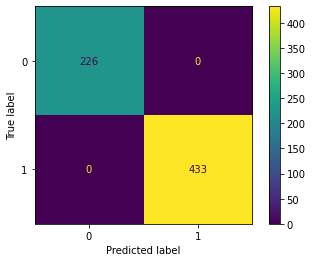

In [96]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Train Set model Random Forest Classifier () tanpa hyperparameternya

cmb = confusion_matrix(y_train, y_pred_train_base, labels=pipeline_rfc.classes_)
dispb = ConfusionMatrixDisplay(confusion_matrix=cmb,display_labels=pipeline_rfc.classes_)

dispb.plot()
plt.show()

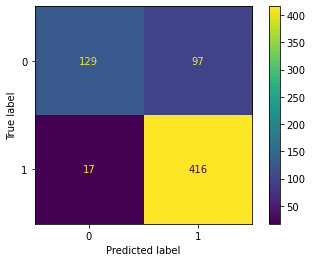

In [97]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Train Set model Random Forest Classifier () dengan hyperparameternya

cmh = confusion_matrix(y_train, y_pred_train_hyper, labels=hyper_pipeline.classes_)
disph = ConfusionMatrixDisplay(confusion_matrix=cmh,display_labels=hyper_pipeline.classes_)

disph.plot()
plt.show()

Adapun metriks evaluasi pemodelan pada data train set di atas mengilustrasikan pemaknaan lebih mudah dari analisis yang telah disampaikan pada paragraf sebelumnya, yaitu pada pemodelan menggunakan Random Forest Classifier () dengan baseline diperoleh 433 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar dan 226 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar. Namun pemodelan seperti ini tidak mungkin terjadi dimana model hasil random forest tree terjadi overfit.

Sementara, pada pemodelan menggunakan Random Forest Classifier () dengan hyperparameter diperoleh 416 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar, namun 97 startup diprediksi berhasil diakuisisi namun kenyataannya startup tersebut gagal diakuisisi. Selain itu, diperoleh 129 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar, namun terdapat 17 startup yang diprediksi tidak berhasi justru kenyataanya berhasil diakuisisi dikemudian. 

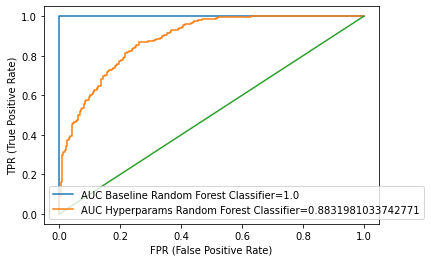

In [99]:
# Membuat plot ROC/AUC skor berdasarkan nilai prediksi y terhadap y_train pada pada tinjauan sensivitity & specifity model Random Forest Classifier baseline vs dengan hyperparameternya

yb_pred_train_proba = pipeline_rfc.predict_proba(X_train_final)[:, 1]
fprb, tprb, _ = roc_curve(y_train, yb_pred_train_proba)
aucb = roc_auc_score(y_train, yb_pred_train_proba)

yh_pred_train_proba = hyper_pipeline.predict_proba(X_train_final)[:, 1]
fprh, tprh, _ = roc_curve(y_train, yh_pred_train_proba)
auch = roc_auc_score(y_train, yh_pred_train_proba)

# Melihat visualisasi plot ROC/AUC terhadap train pada tinjauan evaluasi sensivitity & specifity

plt.plot(fprb, tprb, label=f"AUC Baseline Random Forest Classifier={aucb}")
plt.plot(fprh, tprh, label=f"AUC Hyperparams Random Forest Classifier={auch}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Adapun metriks lainnya yang dapat digunakan untuk evaluasi pemodelan pada data train set di atas ialah dengan menggunakan nilai *AUC Score* atau suatu derajat kemampuan model untuk membedakan startup yang berhasil diakusisi dengan startup yang tidak berhasil diakuisisi. Pada visualisasi tersebut dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier dengan baseline menunjukan angka *AUC Score* = 1,0 (menunjukan overfit), sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai *AUC Score* yang relatif baik yaitu 0,88. 

#### Model Evaluation on Test Set between Baseline vs Hyperparameters

In [100]:
# Memprediksi hasil y terhadap test set dengan menggunakan model Random Forest Classifier () baseline dan hyperparameters
y_pred_test_base = pipeline_rfc.predict(X_test_final)
y_pred_test_hyper = hyper_pipeline.predict(X_test_final)

In [101]:
# Mengevaluasi menggunakan metriks classification_report() pada hasil Random Forest Classifier ()

print('Hasil classification_report pada Test Set model Random Forest Classifier () baseline:\n', classification_report(y_test, y_pred_test_base))
print('Hasil classification_report pada Test Set model Random Forest Classifier () hyperparameters:\n', classification_report(y_test, y_pred_test_hyper))

Hasil classification_report pada Test Set model Random Forest Classifier () baseline:
               precision    recall  f1-score   support

           0       0.91      0.48      0.63        65
           1       0.76      0.97      0.85       108

    accuracy                           0.79       173
   macro avg       0.83      0.72      0.74       173
weighted avg       0.81      0.79      0.77       173

Hasil classification_report pada Test Set model Random Forest Classifier () hyperparameters:
               precision    recall  f1-score   support

           0       0.89      0.49      0.63        65
           1       0.76      0.96      0.85       108

    accuracy                           0.79       173
   macro avg       0.82      0.73      0.74       173
weighted avg       0.81      0.79      0.77       173



Berdasarkan metriks evaluasi pemodelan pada data test set di atas, dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier baseline model dan dengan parameter menunjukan nilai *recall* yang berdekatan yaitu 0,48 dan 0,49, namun kedua nilai tersebut masih belum cukup baik karena masih jauh dari 1,0 dan keduanya dibawah nilai dari train set-nya. Selain itu, f1-score pada kelas=0 dan kelas=1 masih berbeda jauh yaitu 0.22 poin.

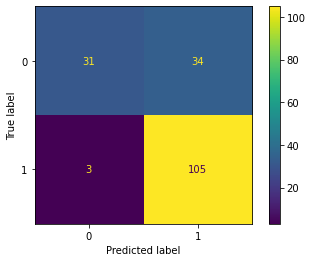

In [102]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Test Set model Random Forest Classifier () tanpa hyperparameternya

cmbt = confusion_matrix(y_test, y_pred_test_base, labels=pipeline_rfc.classes_)
dispbt = ConfusionMatrixDisplay(confusion_matrix=cmbt,display_labels=pipeline_rfc.classes_)

dispbt.plot()
plt.show()

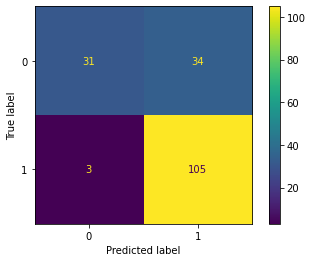

In [103]:
# Mengevaluasi menggunakan metriks confusion_matrix pada Test Set model Random Forest Classifier () tanpa hyperparameternya

cmht = confusion_matrix(y_test, y_pred_test_hyper, labels=hyper_pipeline.classes_)
dispht = ConfusionMatrixDisplay(confusion_matrix=cmbt,display_labels=hyper_pipeline.classes_)

dispht.plot()
plt.show()

Adapun metriks evaluasi pemodelan pada data test set di atas mengilustrasikan pemaknaan lebih mudah dari analisis yang telah disampaikan pada paragraf sebelumnya, yaitu pada pemodelan menggunakan Random Forest Classifier () dengan baseline dan dengan hyperparameter diperoleh 105 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar, namun 34 startup diprediksi berhasil diakuisisi namun kenyataannya startup tersebut gagal diakuisisi. Selain itu, diperoleh 131 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar, namun terdapat 3 startup yang diprediksi tidak berhasi justru kenyataanya berhasil diakuisisi dikemudian. 

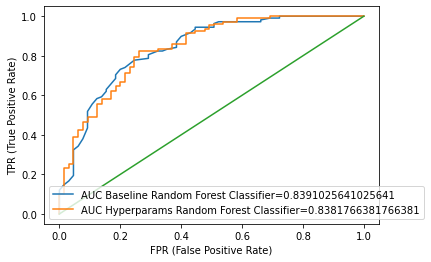

In [104]:
# Membuat plot ROC/AUC skor berdasarkan nilai prediksi y terhadap y_test pada tinjauan sensivitity & specifity model Random Forest Classifier baseline vs dengan hyperparameternya

yb_pred_test_proba = pipeline_rfc.predict_proba(X_test_final)[:, 1]
fprbt, tprbt, _ = roc_curve(y_test, yb_pred_test_proba)
aucbt = roc_auc_score(y_test, yb_pred_test_proba)

yh_pred_test_proba = hyper_pipeline.predict_proba(X_test_final)[:, 1]
fprht, tprht, _ = roc_curve(y_test, yh_pred_test_proba)
aucht = roc_auc_score(y_test, yh_pred_test_proba)

# Melihat visualisasi plot ROC/AUC terhadap train pada tinjauan evaluasi sensivitity & specifity

plt.plot(fprbt, tprbt, label=f"AUC Baseline Random Forest Classifier={aucbt}")
plt.plot(fprht, tprht, label=f"AUC Hyperparams Random Forest Classifier={aucht}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Adapun metriks lainnya yang dapat digunakan untuk evaluasi pemodelan pada data train set di atas ialah dengan menggunakan nilai *AUC Score* atau suatu derajat kemampuan model untuk membedakan startup yang berhasil diakusisi dengan startup yang tidak berhasil diakuisisi. Pada visualisasi tersebut dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier dengan baseline menunjukan angka *AUC Score* = 0,84, sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai *AUC Score* yang tidak jauh berbeda yaitu 0,84. Namun, keduanya turun dari nilai *AUC Score* train set-nya.

#### Manipulation with SMOTE for Model Improvement

Berdasarkan evaluasi di atas, dapat dilihat bahwa proporsi sampel untuk ditraining pada pemodelan tersebut terjadi imbalance dimana minority class ~36%. Maka akan diuji training ulang model dengan melakukan manipulasi data untuk training set agar model dapat lebih banyak belajar pada minority class, sehingga dihasilkan pemodelan yang jauh lebih baik.

Adapaun asumsi yang digunakan ialah keseluruhan X_train_final hasil encoding dinyatakan sebagai numerik, maka algoritma smote yang dipakai ialah SMOTE().

In [105]:
# Melakukan SMOTE pada data train

smote = SMOTE(sampling_strategy=1, random_state=25, k_neighbors=15, n_jobs=-1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)
y_train_balanced.shape

(866, 1)

In [106]:
# Melakuakan training ulang model dengan menggunakan parameter terbaik (hyperparameter) untuk Random Forest Classifier hasil dari GridSearchCV()

hyper_balanced_pipeline = Pipeline([('rfc_hyper_balanced', RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, criterion='entropy',
                                                               max_depth=7, min_samples_leaf=2, min_samples_split=2,
                                                               n_estimators=500, oob_score=True, random_state=25))
                        ])
hyper_balanced_pipeline.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('rfc_hyper_balanced',
                 RandomForestClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=7, min_samples_leaf=2,
                                        n_estimators=500, oob_score=True,
                                        random_state=25))])

In [107]:
# Memprediksi hasil y terhadap train set yang sudah dilakukan SMOTE dengan menggunakan model Random Forest Classifier () dengan hyperparameternya

y_pred_train_balanced_hyper = hyper_balanced_pipeline.predict(X_train_balanced)

In [108]:
# Mengevaluasi menggunakan metriks classification_report() pada hasil model Random Forest Classifier () dengan hyperparameternya dan dengan balanced dataset

print('Hasil evaluasi metriks classification_reprot pada Train Set Original model Random Forest Classifier () dengan hyperparameter:\n', classification_report(y_train, y_pred_train_hyper))
print('Hasil evaluasi metriks classification_reprot pada Train Set Balanced model Random Forest Classifier () dengan hyperparameter:\n', classification_report(y_train_balanced, y_pred_train_balanced_hyper))

Hasil evaluasi metriks classification_reprot pada Train Set Original model Random Forest Classifier () dengan hyperparameter:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69       226
           1       0.81      0.96      0.88       433

    accuracy                           0.83       659
   macro avg       0.85      0.77      0.79       659
weighted avg       0.84      0.83      0.82       659

Hasil evaluasi metriks classification_reprot pada Train Set Balanced model Random Forest Classifier () dengan hyperparameter:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       433
           1       0.78      0.88      0.83       433

    accuracy                           0.82       866
   macro avg       0.82      0.82      0.81       866
weighted avg       0.82      0.82      0.81       866



Setelah dilakukan oversampling pada minority class menggunakan SMOTE, berdasarkan hasil metriks di atas pada Random Forest Classifier () dengan hyperparameters pada balanced train set diperoleh kenaikan nilai *recall* pada kelas `is_acquired` = 0 yang cukup signifikan menjadi 0,75 (+0.18 poin dari imbalanced train set), dimana model dapat menangkap kelas `is_acquired` = 0 lebih baik dan lebih banyak pada prediksinya. Selain itu, f1-score pada kelas=0 dan kelas=1 sudah dekat selisihnya hanya terpaut 0.03 poin.

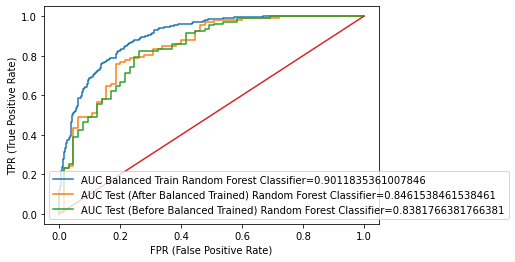

In [109]:
# Membuat plot ROC/AUC skor berdasarkan nilai prediksi y terhadap y_train_balanced pada tinjauan kelas = 1 model Random Forest Classifier vs XG Boosting Classifier dengan hyperparameternya

ybl_pred_train_proba = hyper_balanced_pipeline.predict_proba(X_train_balanced)[:, 1]
fprbl, tprbl, _ = roc_curve(y_train_balanced, ybl_pred_train_proba)
aucbl = roc_auc_score(y_train_balanced, ybl_pred_train_proba)

ytl_pred_train_proba = hyper_balanced_pipeline.predict_proba(X_test_final)[:, 1]
fprtl, tprtl, _ = roc_curve(y_test, ytl_pred_train_proba)
auctl = roc_auc_score(y_test, ytl_pred_train_proba)

yh_pred_test_proba = hyper_pipeline.predict_proba(X_test_final)[:, 1]
fprht, tprht, _ = roc_curve(y_test, yh_pred_test_proba)
aucht = roc_auc_score(y_test, yh_pred_test_proba)

# Melihat visualisasi plot ROC/AUC terhadap train pada tinjauan evaluasi sensivitity & specifity

plt.plot(fprbl, tprbl, label=f"AUC Balanced Train Random Forest Classifier={aucbl}")
plt.plot(fprtl, tprtl, label=f"AUC Test (After Balanced Trained) Random Forest Classifier={auctl}")
plt.plot(fprht, tprht, label=f"AUC Test (Before Balanced Trained) Random Forest Classifier={aucht}")
plt.plot([0,1],[0,1]);
plt.ylabel("TPR (True Positive Rate)")
plt.xlabel("FPR (False Positive Rate)")
plt.legend()

Adapun perbandingan metriks evaluasi AUC Score pada hasil test sebelum di model dilakukan training ulang (warna hijau) dan setelah model dilakukan training ulang (warna oranye) dengan feature engineering *SMOTE* pada train setnya, diperoleh peningkatan nilai AUC Score yang cukup yaitu ~0,1. Selain itu, pemodelan baru dilakukan pasca dilakukan SMOTE diperoleh AUC Score pada train set sebesar 0,90 naik ~0,2 poin dari train sebelum dilakukan SMOTE.

Artinya, pada kondisi dataset yang imbalance mempengaruhi kemampuan model untuk memprediksi pembagian kelas dengan baik, karena proporsi data train set pada kelas = 0 dan kelas = 1 berbeda cukup jauh (36:64). Sehingga, pemodelan diuji ulang dengan memanipulasi secara oversampling pada kelas minority menggunakan SMOTE dan dilakukan training ulang pada dataset oversampling tersebut, diperoleh hasil pemodelan pada test set lamanya menjadi lebih baik dan nilai metriks *recall* nya pun naik cukup signifikan.

Saran untuk pemodelan selanjutnya adalah sebagai berikut:
- Melakukan cross_validate dengan menggunakan algoritma pemodelan lain seperti AdaBoost dan GradientBoosting untuk dilakukan perbandingan dengan model Random Forest Classifier terhadap metriks evaluasinya untuk dilihat kemungkinan perolehan pemodelan yang jauh lebih baik (high recall & AUC Score tinggi).
- Melakukan hyperparameter tuning ulang dengan variasi set value yang baru pada  Random Forest Classifier untuk dilihat kemungkinan perolehan pemodelan yang jauh lebih baik (high recall & AUC Score tinggi).
- Penulis masih belum mengetahui cara menyatukan module sklearn dan imblearn agar metode SMOTE dapat bekeraja dalam Pipeline sklearn yang sama. Sehingga, untuk model inferencing menggunakan Random Forest Classfier dengan hyperparameter hasil best_params_ yang dilakukan training terhadap X_train_final dan y_train (kondisi masih imbalance), yaitu `hyper_pipeline`.
- Implementasi pemodelan akan lebih baik jika disertai deployment pada suatu aplikasi berbasis web sehingga end-user dapat melakukan inferencing secara langsung.
- Dilakukan feature engineering yang lebih komprehensif sehingga diperoleh hasil preprocessing yang lebih baik, dengan mempertimbangkan feature-feature lain dari dataset.

#### Combining Pipelines

In [110]:
# Menggabungkan pipeline-pipeline yang dipakai pada proses modeling

pipelines = Pipeline([('prepp', prep_pipeline),
                      ('model', hyper_pipeline)
                     ])
pipelines.fit(X_train, y_train)

Pipeline(steps=[('prepp',
                 ColumnTransformer(transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age_last_milestone_year',
                                                   'milestones']),
                                                 ('mms_scaler', MinMaxScaler(),
                                                  ['age_first_milestone_year',
                                                   'relationships',
                                                   'funding_rounds',
                                                   'funding_total_usd',
                                                   'avg_participants',
                                                   'is_top500',
                                                   'age_milestone_year_null']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['category_code'])])),
                ('model',
                 Pipeline(steps=[('rfc_hyper',
                                  RandomForestClassifier(ccp_alpha=0.01,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         min_samples_leaf=2,
                                                         n_estimators=500,
                                                         oob_score=True,
                                                         random_state=25))]))])

## 9- Model Saving

In [111]:
# Menyimpan pemodelan pickle dan list untuk model inference 

import joblib
import json

with open('pipelines.pkl', 'wb') as file_1:
  joblib.dump(pipelines, file_1)

with open('num_columns.txt', 'w') as file_2:
  json.dump(num_columns, file_2)

with open('cat_columns.txt', 'w') as file_3:
  json.dump(cat_columns, file_3)

with open('norm_columns.txt', 'w') as file_4:
  json.dump(norm_columns, file_4)

with open('skew_columns.txt', 'w') as file_5:
  json.dump(skew_columns, file_5)

with open('enc_columns.txt', 'w') as file_6:
  json.dump(enc_columns, file_6)

## 10- Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Loading

In [112]:
# Memuat ulang pemodelan pickle dan list untuk model inference 

with open('pipelines.pkl', 'rb') as file_1:
  pipelines = joblib.load(file_1)

with open('num_columns.txt', 'r') as file_2:
  num_columns = json.load(file_2)

with open('norm_columns.txt', 'r') as file_3:
  norm_columns = json.load(file_3)

with open('skew_columns.txt', 'r') as file_4:
  skew_columns = json.load(file_4)

with open('cat_columns.txt', 'r') as file_5:
  cat_columns = json.load(file_5)

with open('enc_columns.txt', 'r') as file_6:
  enc_columns = json.load(file_6)

In [113]:
# Menampilkan Inference Set

data_inf

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age_milestone_year_null
0,3.4986,3.4986,3.0000,3.0000,6,1,5000000,1,cleantech,0,...,0,0,1,0,0,0,1.0000,1,0,0
1,2.6575,2.6575,0.0000,0.0000,1,1,4000000,1,software,1,...,0,0,0,1,0,0,1.0000,1,0,0
2,0.4658,1.2247,0.0000,1.2247,5,2,300000,2,games_video,0,...,0,1,0,1,0,0,2.0000,1,0,0
3,10.3644,10.3644,5.8384,5.8384,4,1,21000000,1,semiconductor,0,...,1,0,0,0,0,0,5.0000,1,0,0
4,0.0548,0.0548,0.0685,0.4000,4,1,100000,2,social,0,...,0,1,0,0,0,0,1.0000,0,0,0
5,1.6658,2.1123,2.3041,3.5507,23,2,6100000,2,social,0,...,0,0,1,1,0,0,1.0000,1,1,0
6,2.5726,2.5726,2.4795,4.6685,7,1,500000,2,web,0,...,0,1,0,0,0,0,5.0000,1,1,0
7,0.4329,1.1260,2.6904,3.5397,23,2,9800000,2,news,0,...,0,1,1,0,0,0,4.5000,1,1,0
8,7.5123,9.9479,0.4164,0.4164,3,5,51450000,1,games_video,0,...,1,0,0,0,0,1,5.6667,1,1,0
9,1.2521,1.8740,4.7178,5.0959,13,3,2600000,2,network_hosting,0,...,0,1,1,0,0,0,3.6667,1,1,0


In [114]:
# Melakukan drop target data_inf menjadi drop_inf_features

drop_inf_features = data_inf.drop('is_acquired', axis=1)

### Inferencing

In [115]:
# Memprediksi y menggunakan model Random Forest Classifier () dengan Hyperparameters terhdapa drop_inf_features

y_pred_inf = pipelines.predict(drop_inf_features)
y_pred_inf

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [116]:
# Menyimpan dalam bentuk dataframe hasil klasifikasi menggunakan model Random Forest Classifier () dengan Hyperparameters

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['prediction'])
y_pred_inf_df

,prediction
0,1
1,0
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1


In [117]:
data_inf.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'is_acquired', 'age_milestone_year_null'],
      dtype='object')

In [118]:
# Menyatukan dataframe hasil klasifikasi menggunakan odel Random Forest Classifier () dengan Hyperparameters ke dalam data_inf

data_inf  = data_inf.reindex(columns=['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'age_milestone_year_null', 'is_acquired'])

In [119]:
data_inf  = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_inf

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,is_software,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age_milestone_year_null,is_acquired,prediction
0,3.4986,3.4986,3.0000,3.0000,6,1,5000000,1,cleantech,0,...,0,1,0,0,0,1.0000,1,0,0,1
1,2.6575,2.6575,0.0000,0.0000,1,1,4000000,1,software,1,...,0,0,1,0,0,1.0000,1,0,0,0
2,0.4658,1.2247,0.0000,1.2247,5,2,300000,2,games_video,0,...,1,0,1,0,0,2.0000,1,0,0,1
3,10.3644,10.3644,5.8384,5.8384,4,1,21000000,1,semiconductor,0,...,0,0,0,0,0,5.0000,1,0,0,1
4,0.0548,0.0548,0.0685,0.4000,4,1,100000,2,social,0,...,1,0,0,0,0,1.0000,0,0,0,0
5,1.6658,2.1123,2.3041,3.5507,23,2,6100000,2,social,0,...,0,1,1,0,0,1.0000,1,0,1,1
6,2.5726,2.5726,2.4795,4.6685,7,1,500000,2,web,0,...,1,0,0,0,0,5.0000,1,0,1,1
7,0.4329,1.1260,2.6904,3.5397,23,2,9800000,2,news,0,...,1,1,0,0,0,4.5000,1,0,1,1
8,7.5123,9.9479,0.4164,0.4164,3,5,51450000,1,games_video,0,...,0,0,0,0,1,5.6667,1,0,1,1
9,1.2521,1.8740,4.7178,5.0959,13,3,2600000,2,network_hosting,0,...,1,1,0,0,0,3.6667,1,0,1,1


## 11- Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

### Ringkasan Pengerjaan dan Kesimpulan

Berdasarkan dataset yang telah diperoleh dari Kaggle untuk memprediksi Membuat pemodelan klasifikasi untuk memprediksi keberhasilan suatu startup diakuisisi oleh perusahaan besar agar potensi pertumbuhannya semakin cepat, sehingga memungkinkan mereka untuk selangkah lebih maju dari persaingan.

#### Adapun proses 'Exploratory Data Analysis' diperoleh informasi penting sebagai berikut:

- Berdasarkan visualisasi heatmap correlation, fitur-fitur yang diwakili pada kolom `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `has_roundA`, `has_roundB`, `has_roundC`, `avg_participants`, dan `is_top500` memiliki korelasi yang cukup terhadap target `is_acquired`, setidaknya nilai korelasi di antaranya paling kecil adalah 0,15 hingga 0,36.

- Berdasarkan visualisasi histogram, perolehan pendanaan pertama kali `age_first_funding_year` pada startup terjadi pada usia startup kurang dari 5 tahun, yaitu terdapat sekitar 800 unit pendanaan, dimana paling tinggi yaitu saat usia startup sekitar 1 tahun (sekitar 400 unit pendanaan). Sementara, perolehan pendanaan terakhir kali `age_last_funding_year` pada startup paling tinggi terjadi pada usia startup usia kurang dari 5 tahun, setelah itu pendanaan turun secara signifikan. Adapun tercapainya milestone pertama kali `age_first_milestone_year` pada startup terjadi pada usia kurang dari 5 tahun mencapai lebih dari 450 unit ketercapaian milestone. Sementara, ketercapaian milestone terakhir kali `age_first_milestone_year` pada startup terjadi puncaknya pada usia sekitar 5 tahun, lalu berangsur-angsur menurun. Maka, dapat disimpulkan secara umum 5 tahun pertama menjadi sangat penting bagi startup karena pada periode tersebut biasanya terjadi suatu pendanaan dan ketercapaian suatu milestone.

- Berdasarkan visualisasi countplot, terdapat kekhasan tertentu pada kolom fitur `category_code` terhadap kolom target `is_acquired`, yaitu ada beberapa bidang startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi hampir 2x lipatnya daripada bidang lainnya, seperti startup di bidang music, enterprise, web, software, network hosting, finance, mobile, education, security, photo-video, advertising, travel, analytics, consulting, biotech, semiconductor, news, transportation, sport, dan health. Sementara, pada bidang public relation, hardware, ecommerce, dan lainnya justru rasio tidak berhasil diakuisisi lebih besar daripada diakuisisi.

- Berdasarkan visualisasi countplot, terdapat kekhasan tertentu pada kolom fitur `funding_rounds` terhadap kolom target `is_acquired`, yaitu apabila pendanaannya sudah dilakukan setidaknya 2x (diwakili no. 2) maka startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi. Selain itu, rata-rata pendanaan `funding_rounds` sekitar 2,5 pada `is_acquired` = 1 lebih tinggi daripada label = 0 yang nilainya rata-ratanya <2.

- Berdasarkan visualisasi countplot, terdapat juga kekhasan tertentu pada kolom fitur `milestones` terhadap kolom target `is_acquired`, yaitu apabila milestonenya tercapai setidaknya 1x dan seterusnya maka startup yang memiliki rasio diakuisisi `is_acquired` = 1 terhadap tidak diakusisi/gagal `is_acquired` = 0 lebih tinggi. Selain itu, rata-rata banyaknya ketercapaian `milestones` sekitar 2,1 pada `is_acquired` = 1 lebih tinggi daripada label = 0 yang nilai rata-ratanya sekitar 1 (1,25).

- Berdasarkan visualisasi countplot, tidak terdapat kekhasan tertentu pada kolom `has_VC` dan `has_angel` dimana startup yang memiliki pemodal venture capitalist dan penyumbang sukarela angel investor keduanya didominasi oleh label `is_acquired`=1, sehingga tidak ada pembeda antara yang memiliki pendaan awal (seed) dengan yang tidak pada kemungkinan untuk diakuisis atau tidaknya. Kolom lainnya juga menunjukan hal yang sama, yaitu tidak terdapat kekhasan tertentu pada kolom `has_roundA`, `has_roundB`, `has_roundC` dan `has_roundD` dimana startup yang memiliki pendanaan series A,B,C,D ataupun tidak keduanya didominasi oleh label `is_acquired`=1, sehingga tidak ada pembeda antara yang memiliki pendaan series A,B,C,D dengan yang tidak pada kemungkinan untuk diakuisis atau tidaknya.

- Berdasarkan visualisasi countplot, terjadi kekhasan tertentu pada kolom `is_top500` yaitu startup yang dikategorikan bervaluasi tinggi dan masuk top500 maka kemungkinan untuk diakusisi oleh perusahaan besar lainnya atau dibeli `is_acquired`=1 lebih tinggi, sementara startup yang di luat kategori tersebut justru peluang tidak diakuisi lebih besar.

- Berdasarkan hasil *query & aggregating*, terdapat kekhasan tertentu pada kolom fitur `relationships` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai derajat relasi `relationships` yang lebih tinggi 2x daripada yang tidak diakuisisi. 

- Berdasarkan hasil *query & aggregating*, terdapat kekhasan tertentu pada kolom fitur `funding_rounds` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai derajat relasi `funding_rounds` yang lebih tinggi daripada yang tidak diakuisisi < 2,0.

- Berdasarkan hasil *query & aggregating*, tidak terdapat kekhasan tertentu pada kolom fitur `age_first_funding_year` dan `age_last_funding_year` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi dengan yang tidak berhasil diakusisi hanya terpaut 0,4 tahun atau kurang dari 6 pada konteks usia startup saat peroleh pendanaan pertama dan pendanaan terakhirnya dimana angka tersebut tidak cukup signifikan perbedaannya. 

- Berdasarkan hasil *query & aggregating*, tidak terdapat kekhasan tertentu pada kolom fitur `age_first_milestone_year` dan `age_last_milestone_year` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi dengan yang tidak berhasil diakusisi terpaut 1,1 tahun dan 1,8 pada konteks usia startup saat tercapai milestone pertama dan milestone terakhirnya dimana angka tersebut cukup berbeda signifikan.

- Berdasarkan hasil *query & aggregating*, terdapat kekhasan tertentu pada kolom fitur `avg_participants` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai rata-rata pesertanya `avg_participants` yang lebih tinggi 1,3x daripada yang tidak diakuisisi. 

- Berdasarkan hasil *query & aggregating*, terdapat kekhasan tertentu pada kolom fitur `funding_total_usd` terhadap kolom target `is_acquired`, yaitu startup yang berhasil diakusisi mempunyai rata-rata total pendaan yang diperoleh (dalam USD) `funding_total_usd` yang lebih tinggi 2x daripada yang tidak diakuisisi. 

- Pada kolom fitur `age_first_milestone_year` & `age_last_milestone_year` terdapat pola kehilangan data lebih banyak pada kelompok `is_acquired` = 0 yaitu 105 (2x lipatnya), sementara pada label 1 hanya 47. Sehingga dapat diasumsikan bahwa startup yang gagal diakuisisi informasi terkait usia saat terpacai milestone pertama & milestone terakhirnya tidak dapat diperoleh informasinya. Sehingga, akan dilakukan prosedur *feature engineering* yang tepat untuk kasus ini sebagaimana mestinya. Untuk kepentingan selanjutnya, data/value yang mengandung null-value pada kolom `age_first_milestone_year` & `age_last_milestone_year` akan ditandai dengan dataframe baru.

#### Adapun tahap preprocessing sebelum dilakukannya pemodelan secara umum adalah sebagai berikut:

- dilakukan pemisahan dataset menjadi inference-set (13 rows set), train-set (80% dari sisa setelah dipisah dengan inference-set), dan test-set (20% dari sisa setelah dipisah dengan inference-set).

- dilakukan *handling missing value* di train set & test set pada kolom `age_first_milestone_year` dan `age_last_milestone_year` dimana terjadi kehilangan nilai (*missing value*) bersifat MNAR (*misssing not at random*) karena kehilangan tersebut berkaitan dengan target `is_acquired`, dimana ada kecenderungan kondisi startup yang tidak berhasil diakuisisi itu bubar atau tidak dapat diperoleh informasinya, sehingga metode handling yang tepat pada kondisi tersebut ialah dengan memberikan *flagging* penanda pada kolom yang nilainya null dan dilakukan imputasi menggunakan nilai mediannya. Sementara, untuk kondisi nilai negatif pada kolom  `age_first_milestone_year` dan `age_last_milestone_year` diasumsikan sebagai *missing value* namun bersifat MCAR, maka metode handling yang paling tepat ialah dengan dilakukan drop (dibuang baris yang mengandung nilai <0) mengingat persentasenya pun hanya 4,7% (kurang dari 5%).

- dilakukan *handling outliers* di train set pada Adapun handling outliers pada kolom `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `funding_total_usd`, `milestones`, dan `avg_participants`. Selain itu, `age_first_funding_year` dan `age_last_funding_year` tidak akan dikerjakan proses handling outliersnya, karena tidak akan dipilih fitur tersebut untuk proses selanjutnya karena hasil EDA-nya tidak menunjukan korelasi yang cukup. Berdasarkan persentase nilai yang berada di atas limit boundary nya, diketahui bahwa pada total outliers pada kolom  `age_first_milestone_year`, `age_last_milestone_year`, `relationships`, `funding_rounds`, `funding_total_usd`, `milestones`, dan `avg_participants`kurang dari 5%, sehingga akan dilakukan metode trimming.

- *handling outliers* pada test set tidak dilakukan.

- dilakukan pembuatan pipeline columntransformer bernama `prep_pipeline` (berupa feature scaling pada fitur numerik dan feature encoding pada kategori) untuk dilakukan fit_transform pada train set dan transform pada test set.

#### Adapun pendekatan pemilihan *feature* dilakukan justifikasi melalui analisis EDA meliputi heatmap correlation, visualisasi countplout, grouping & aggregating yaitu sebagai berikut:

Berdasarkan analisis pada Exploratory Data Analysis pada kelompok *features* numerik maupun kategori, terdapat beberapa yang memiliki korelasi kuat terhadap pembagian kelas / klasifikasi `is_acquired`.

- *Numerical*
    - `age_first_milestone_year` : rata-rata `age_first_milestone_year` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `age_last_milestone_year` : rata-rata `age_first_milestone_year` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `relationships` : rata-rata `relationships` pada label `is_acquired` = 1 lebih besar daripada label = 0.
    - `funding_rounds` : rata-rata `funding_rounds` pada label `is_acquired` = 1 lebih besar daripada label = 0. 
    - `funding_total_usd` : rata-rata `funding_total_usd` pada label `is_acquired` = 1 lebih besar daripada label = 0
    - `milestones` : : rata-rata `milestones` pada label `is_acquired` = 1 lebih besar daripada label = 0
    - `avg_participants` : : rata-rata `milestones` pada label `is_acquired` = 1 lebih besar daripada label = 0
- *Pre-encoding Columns Considered as Numerical*
    - `is_top500` : jumlah label `is_acquired` = 1 pada `is_top500` = 1 lebih besar daripada label = 0.
    - `age_milestone_year_null` : tabulasi penanda missing value MNAR pada kolom `age_first_milestone_year` dan `age_last_milestone_year`.
- *Categorical*
    - `category_code` : jumlah label `is_acquired` = 1 pada beberapa jenis tertentu di kolom `category_code` menunjukan lebih dominan, sementara beberepa jenis lainnya tidak.

#### Adapun pemilihan model dan metriks evaluasi pada pemodelan ini adalah sebagai berikut:

Pada kasus kali ini, dimana *objective* yang diharapakan terjadi ialah suatu pemodelan *supervised learning* untuk memprediksi klasifikasi `is_acquired` dari dataset informasi terkait startup yang berhasil diakuisisi oleh perusahaan besar, dapat dikatakan valuasi meningkat/investasi berhasil, atau startup gagal diakusisi, maka pemodelan akan dilakukan dengan berbagai algoritma/model sebagai berikut:
1. **Logistic Regression** 
2. **Support Vector Machine**
3. **Decision Tree**
4. **Random Forest**
5. **KNN**
6. **Naive Bayes**
7. **Xtreme Gradient Boosting**

dimana akan menghasilkan suatu *rules* yang nantinya dapat menentukan suatu probabilitas untuk diklasifikasikan kedalam suatu kelas `is_acquired` = 0 atau = 1, yang diharapkan dapat diprediksi dengan mempelajari features dan target dari dataset yang telah ditraining.

Adapun model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang yang telah disebutkan, lalu akan dilakukan cross validation menggunakan cross_val_score() untuk mencari AUC Score mean dan std untuk setiap model. Selanjutnya, akan dilakukan hyperparameter tuning menggunakan GridSearchCV() pada algoritma terbaik berdasarkan cross validation dengan evaluasi AUC Score.

#### Model Selection

Berdasarkan evaluasi cross validation menggunakan cross_val_score() untuk mencari baseline model terbaik dengan metriks evaluasi roc-auc score, dimana baseline model terbaik dipilih berdasarkan nilai rata-rata (mean) tertinggi disertai nilai standar deviasi (std) paling kecil, menandakan konsistensi hasil untuk setiap cross validationnya, maka diperoleh hasil pemodelan baseline model terbaik ialah sebagai berikut:

- **Random Forest Classifier: rata-rata & std roc-auc score: 0.811 ± 0.017**

Adapun baseline model tersebut selanjutnya akan dilakukan hyperparameter tuning menggunakan GridSearchCV() untuk memperoleh parameter terbaiknya.

#### Hyperparameter Tuning

Adapun hyperparameter yang akan dilakukan simulasi menggunakan GridSearchCV() akan dipilih berdasarkan evaluasi nilai scoring 'roc_auc' yang lebih tinggi, dimana AUC scorenya semakin mendekati 100% semakin baik, disamping itu evaluasi  scoring 'roc_auc' dipilih karena evaluasi tersebut mampu melihat klasifikasi dari sebaran kelas lebih objektif daripada accuracy_score.

Berikut adalah parameter dan nilai set dari parameter yang akan dilakukan simulasi pemodelan menggunakan GridSearchCV() untuk dihasilkan hyperparameternya:
- Random Forest Classifier
    - n_estimators = 20, 500, 100, 200
    - ccp_alpha = 0.01, 0.02, 0.05, 0.1
    - max_depth = 2, 3, 5, 10
    - min_samples_leaf = 1, 2, 3, 5
    - min_samples_split = 2, 3, 5, 7
    - oob_score = True
    - bootstrap = True, False
    - criterion = gini, entropy
    
- Parameter terbaik hasil GridSearchCV() 	 
    - {'clf_rfc__bootstrap': True, 'clf_rfc__ccp_alpha': 0.01, 'clf_rfc__criterion': 'entropy', 'clf_rfc__max_depth': 7, 'clf_rfc__min_samples_leaf': 2, 'clf_rfc__min_samples_split': 2, 'clf_rfc__n_estimators': 500, 'clf_rfc__oob_score': True, 'clf_rfc__random_state': 25}
- Nilai AUC skor hasil GridSearchCV() 
    - 0.83
- Random Forest Classifier dengan hyperparameter dilakukan retraining ulang pada train set dan disimpan dalam pipeline bernama `hyper_pipeline`

#### Adapun evaluasi model Random Forest Classifier (hyperparameter) terhadap Random Forest Classifier (baseline) pada train set adalah sebagai berikut:

- Berdasarkan metriks evaluasi pemodelan pada data train set, pemodelan menggunakan Random Forest Classifier baseline model terjadi overfit dimana semua metriks evaluasi bernilai 1,0, sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai yang lebih representatif dan objektif.
- Adapun konteks pemodelan ini ialah ingin mencari suatu pemodelan yang dapat memprediksi dengan tepat startup-startup mana saja yang pada akhirnya terbukti berhasil diakuisisi perusahaan besar karena valuasi perusahaannya baik, dengan prinsip kehati-hatian agar calon investor dapat dengan tepat menanamkan modalnya pada startup yang tepat, maka metriks evaluasi yang dapat ditinjau ialah metriks *recall* pada kelas `is_acquired` = 0 (startup gagal berhasil diakuisisi oleh perusahaan besar karena valuasinya tidak baik), yaitu melihat seberapa banyak jumlah data yang bisa diprediksi benar kelas=0 dari keseluruhan data kelas =0. Maka dibutuhkan evaluasi model yang *high recall* dimana mampu menurunkan derajat kesalahan diprediksi sebagai kelas=1 ternyata kelas=0.
- Berdasarkan hasil metriks pada Random Forest Classifier () dengan hyperparameters , nilai *recall* pada kelas `is_acquired` = 0 menunjukan angka yang belum cukup baik hanya 0,57, dimana model belum dapat menangkap kelas `is_acquired` = 0 dengan baik pada prediksinya. Selain itu, f1-score pada kelas=0 dan kelas=1 masih berbeda jauh yaitu 0.19 poin.
- Adapun confusion matrixnya pemodelan pada data train set mengilustrasikan pemaknaan lebih mudah dari analisis yang telah disampaikan pada paragraf sebelumnya, yaitu pada pemodelan menggunakan Random Forest Classifier () dengan baseline diperoleh 433 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar dan 226 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar. Namun pemodelan seperti ini tidak mungkin terjadi dimana model hasil random forest tree terjadi overfit.
- Berdasarkan hasil confusion matrixnya,pemodelan menggunakan Random Forest Classifier () dengan hyperparameter diperoleh 416 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar, namun 97 startup diprediksi berhasil diakuisisi namun kenyataannya startup tersebut gagal diakuisisi. Selain itu, diperoleh 129 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar, namun terdapat 17 startup yang diprediksi tidak berhasi justru kenyataanya berhasil diakuisisi dikemudian. 
- Adapun metriks lainnya yang dapat digunakan untuk evaluasi pemodelan pada data train set di atas ialah dengan menggunakan nilai *AUC Score* atau suatu derajat kemampuan model untuk membedakan startup yang berhasil diakusisi dengan startup yang tidak berhasil diakuisisi. Pada visualisasi tersebut dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier dengan baseline menunjukan angka *AUC Score* = 1,0 (menunjukan overfit), sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai *AUC Score* yang relatif baik yaitu 0,88.

#### Adapun evaluasi model Random Forest Classifier (hyperparameter) terhadap Random Forest Classifier (baseline) pada test set adalah sebagai berikut:

- Berdasarkan metriks evaluasi pemodelan pada data test set di atas, dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier baseline model dan dengan parameter menunjukan nilai *recall* yang berdekatan yaitu 0,48 dan 0,49, namun kedua nilai tersebut masih belum cukup baik karena masih jauh dari 1,0 dan keduanya dibawah nilai dari train set-nya. Selain itu, f1-score pada kelas=0 dan kelas=1 masih berbeda jauh yaitu 0.22 poin.
- Adapun metriks evaluasi pemodelan pada data test set di atas mengilustrasikan pemaknaan lebih mudah dari analisis yang telah disampaikan pada paragraf sebelumnya, yaitu pada pemodelan menggunakan Random Forest Classifier () dengan baseline dan dengan hyperparameter diperoleh 105 startup diprediksi dengan tepat sebagai startup yang berhasil diakuisisi oleh perusahaan besar, namun 34 startup diprediksi berhasil diakuisisi namun kenyataannya startup tersebut gagal diakuisisi. Selain itu, diperoleh 131 startup diprediksi dengan tepat sebagai startup yang  tidak berhasil diakuisisi oleh perusahaan besar, namun terdapat 3 startup yang diprediksi tidak berhasi justru kenyataanya berhasil diakuisisi dikemudian. 
- Adapun metriks lainnya yang dapat digunakan untuk evaluasi pemodelan pada data train set di atas ialah dengan menggunakan nilai *AUC Score* atau suatu derajat kemampuan model untuk membedakan startup yang berhasil diakusisi dengan startup yang tidak berhasil diakuisisi. Pada visualisasi tersebut dapat dilihat bahwa pemodelan menggunakan Random Forest Classifier dengan baseline menunjukan angka *AUC Score* = 0,84, sementara pemodelan menggunakan Random Forest Classifier dengan hyperparameter menunjukan nilai *AUC Score* yang tidak jauh berbeda yaitu 0,84. Namun, keduanya turun dari nilai *AUC Score* train set-nya.

#### Adapun model improvement yang dilakukan pada Random Forest Classifier (hyperparameter) adalah sebagai berikut:
- Berdasarkan evaluasi di atas, dapat dilihat bahwa proporsi sampel untuk ditraining pada pemodelan tersebut terjadi imbalance dimana minority class ~36%. Maka akan diuji training ulang model dengan melakukan manipulasi data untuk training set agar model dapat lebih banyak belajar pada minority class, sehingga dihasilkan pemodelan yang jauh lebih baik. Adapaun asumsi yang digunakan ialah keseluruhan X_train_final hasil encoding dinyatakan sebagai numerik, maka algoritma smote yang dipakai ialah SMOTE().
- Adapun parameter SMOTE yang setelahnya dilakukan retaining ulang pada model dengan train set yang bersifat *balanced* ialah sebagai berikut:
    - sampling_strategy=1, random_state=25, k_neighbors=15, n_jobs=-1
- Setelah dilakukan oversampling pada minority class menggunakan SMOTE, berdasarkan hasil metriks pada Random Forest Classifier () dengan hyperparameters pada balanced train set diperoleh kenaikan nilai *recall* pada kelas `is_acquired` = 0 yang cukup signifikan menjadi 0,75 (+0.18 poin dari imbalanced train set), dimana model dapat menangkap kelas `is_acquired` = 0 lebih baik dan lebih banyak pada prediksinya. Selain itu, f1-score pada kelas=0 dan kelas=1 sudah dekat selisihnya hanya terpaut 0.03 poin.
- Adapun perbandingan metriks evaluasi AUC Score pada hasil test sebelum di model dilakukan training ulang dan setelah model dilakukan training ulang dengan feature engineering *SMOTE* pada train setnya, diperoleh peningkatan nilai AUC Score yang cukup yaitu ~0,1. Selain itu, pemodelan baru dilakukan pasca dilakukan SMOTE diperoleh AUC Score pada train set sebesar 0,90 naik ~0,2 poin dari train sebelum dilakukan SMOTE.
- Artinya, pada kondisi dataset yang imbalance mempengaruhi kemampuan model untuk memprediksi pembagian kelas dengan baik, karena proporsi data train set pada kelas = 0 dan kelas = 1 berbeda cukup jauh (36:64). Sehingga, pemodelan diuji ulang dengan memanipulasi secara oversampling pada kelas minority menggunakan SMOTE dan dilakukan training ulang pada dataset oversampling tersebut, diperoleh hasil pemodelan pada test set lamanya menjadi lebih baik dan nilai metriks *recall* nya pun naik cukup signifikan.

#### Saran untuk pemodelan selanjutnya adalah sebagai berikut:
- Melakukan cross_validate dengan menggunakan algoritma pemodelan lain seperti AdaBoost dan GradientBoosting untuk dilakukan perbandingan dengan model Random Forest Classifier terhadap metriks evaluasinya untuk dilihat kemungkinan perolehan pemodelan yang jauh lebih baik (high recall & AUC Score tinggi).
- Melakukan hyperparameter tuning ulang dengan variasi set value yang baru pada  Random Forest Classifier untuk dilihat kemungkinan perolehan pemodelan yang jauh lebih baik (high recall & AUC Score tinggi).
- Penulis masih belum mengetahui cara menyatukan module sklearn dan imblearn agar metode SMOTE dapat bekeraja dalam Pipeline sklearn yang sama. Sehingga, untuk model inferencing menggunakan Random Forest Classfier dengan hyperparameter hasil best_params_ yang dilakukan training terhadap X_train_final dan y_train (kondisi masih imbalance), yaitu `hyper_pipeline`.
- Implementasi pemodelan akan lebih baik jika disertai deployment pada suatu aplikasi berbasis web sehingga end-user dapat melakukan inferencing secara langsung.
- Dilakukan feature engineering yang lebih komprehensif sehingga diperoleh hasil preprocessing yang lebih baik, dengan mempertimbangkan feature-feature lain dari dataset.

### **Thank you! Any feedback is very appreciated**